In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
# Read dataset
df = pd.read_csv('datasets/3. online_shoppers_intention_clean.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,0,0.00,2,20.2,11,473.833333,0.000000,0.025000,0.0,0.0,June,3,2,8,3,Returning_Visitor,False,False
12220,1,27.00,2,22.0,16,408.250000,0.000000,0.014118,0.0,0.0,May,4,1,1,4,Returning_Visitor,False,False
12221,7,53.25,0,0.0,42,650.033333,0.004348,0.006522,0.0,0.0,May,2,2,2,4,Returning_Visitor,False,False
12222,3,36.00,2,16.0,74,4377.708157,0.020000,0.029309,0.0,0.0,Nov,1,2,3,2,Returning_Visitor,False,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12224 entries, 0 to 12223
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12224 non-null  int64  
 1   Administrative_Duration  12224 non-null  float64
 2   Informational            12224 non-null  int64  
 3   Informational_Duration   12224 non-null  float64
 4   ProductRelated           12224 non-null  int64  
 5   ProductRelated_Duration  12224 non-null  float64
 6   BounceRates              12224 non-null  float64
 7   ExitRates                12224 non-null  float64
 8   PageValues               12224 non-null  float64
 9   SpecialDay               12224 non-null  float64
 10  Month                    12224 non-null  object 
 11  OperatingSystems         12224 non-null  int64  
 12  Browser                  12224 non-null  int64  
 13  Region                   12224 non-null  int64  
 14  TrafficType           

In [4]:
for col in df:
    print(col, ": ",df[col].unique(), "\n")

Administrative :  [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Administrative_Duration :  [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] 

Informational :  [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

Informational_Duration :  [  0.   120.    16.   ... 547.75 368.25 211.25] 

ProductRelated :  [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 1

# For "Weekend" and "Revenue" features, turn the boolean values into 1 and 0

In [5]:
# Convert 'Revenue' and 'Weekend' to integers
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

# Check the result
print(df[['Revenue', 'Weekend']].head())

   Revenue  Weekend
0        0        0
1        0        0
2        0        0
3        0        0
4        0        1


According to https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset:

The dataset is made out of 10 numerical and 8 categorical attributes. \
The 'Revenue' attribute is the target attribute.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year..

# Levels of measurement of each feature

Administrative: Ratio \
Represents number of pages visited for this type. Has a true zero point (aka, no pages were accessed), and calculating the difference or ratios between the number of pages visited is meaningful (eg, 3 pages visited is 2 pages less than 5 pages visited, visiting 10 pages is 2 times as much as visiting 5 pages).


Administrative_Duration: Ratio \
Represents the amount of time spent on pages of this type. Has a true zero point (aka spent no time on pages), and calculating the difference or ratios between time spent is meaningful (eg, 60 seconds spent is 20 seconds longer than 40 seconds, 2 minutes spent is 2 times longer than 1 minute).

Informational: Ratio \
Represents number of pages visited for this type. Has a true zero point (aka, no pages were accessed), and calculating the difference or ratios between the number of pages visited is meaningful (eg, 3 pages visited is 2 pages less than 5 pages visited, visiting 10 pages is 2 times as much as visiting 5 pages).

Informational_Duration: Ratio \
Represents the amount of time spent on pages of this type. Has a true zero point (aka spent no time on pages), and calculating the difference or ratios between time spent is meaningful (eg, 60 seconds spent is 20 seconds longer than 40 seconds, 2 minutes spent is 2 times longer than 1 minute).

ProductRelated: Ratio \
Represents number of pages visited for this type. Has a true zero point (aka, no pages were accessed), and calculating the difference or ratios between the number of pages visited is meaningful (eg, 3 pages visited is 2 pages less than 5 pages visited, visiting 10 pages is 2 times as much as visiting 5 pages).

ProductRelated_Duration: Ratio \
Represents the amount of time spent on pages of this type. Has a true zero point (aka spent no time on pages), and calculating the difference or ratios between time spent is meaningful (eg, 60 seconds spent is 20 seconds longer than 40 seconds, 2 minutes spent is 2 times longer than 1 minute).

BounceRates: Ratio \
https://www.trafficguard.ai/blog/everything-you-need-to-know-about-bounce-rate-in-google-analytics-4 \
It is a numerical representation in percentage (which has a meaningful zero, i.e. 0% bounce rate = no bounce occurred). Ratios of bounce rate percentage is meaningful as well.

ExitRates: Ratio \
https://clictadigital.com/what-is-a-good-exit-rate-in-google-analytics/ \
It is a numerical representation in percentage (which has a meaningful zero, i.e. 0% exit rate = no exit occurred). Ratios of exit rate percentage is meaningful as well.

PageValues: Ratio \
https://infotrust.com/articles/a-guide-to-page-value/#:~:text=Google%20Analytics%20Page%20Value%20Report,(pageviews)%20to%20that%20page \
Represents the average value for a page that the user visited before a transaction was completed. It has a meaningful zero (i.e. 0 = pages that were visited did not generate any value). Ratios are also meaningful (page with value 100 is 10 times more impactful for revenue generation than a page with value 10).

SpecialDay: Interval \
This feature represents (from 0.0 to 1.0) how close a visit is to a special day, and values increase as the special day approaches. Saying that a day is two times more special than another day doesn't make much sense as we only understand that one day is further or closer to the special event.

Months: Ordinal \
Months of each year does have an order but intervals are not equal as different months have different number of days (28 - 31 days).

OperatingSystems: Nominal \
Representation of categories of operating systems with no order.

Browser: Nominal \
Representation of categories of web browsers with no order.

Region: Nominal \
Representation of categories of regions with no order.

TrafficType: Nominal \
Representation of categories of type of traffic with no order.

VisitorType: Nominal \
This feature categorises visitors into types such as "Returning_Visitor", "New_Visitor", or "Other" without any order.

Weekend: Nominal \
This feature is a boolean value that shows either true or false. Aka: presence or absence of a condition.

Revenue: Nominal \
This feature is a boolean value that shows either true or false. Aka: presence or absence of a condition.

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000,12224.000000
mean,2.337205,81.538531,0.508426,34.776085,32.026832,1206.227466,0.020482,0.041567,5.627931,0.061993,2.124427,2.356757,3.152814,4.072153,0.234130,0.156168
std,3.329096,177.376839,1.274972,141.320666,44.573409,1918.809457,0.045456,0.046319,18.202080,0.199718,0.906933,1.709089,2.401773,4.015111,0.423471,0.363030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,192.745833,0.000000,0.014257,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.408333,0.002927,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,94.600000,0.000000,0.000000,38.000000,1476.350000,0.016667,0.048679,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


# Univariate Analysis

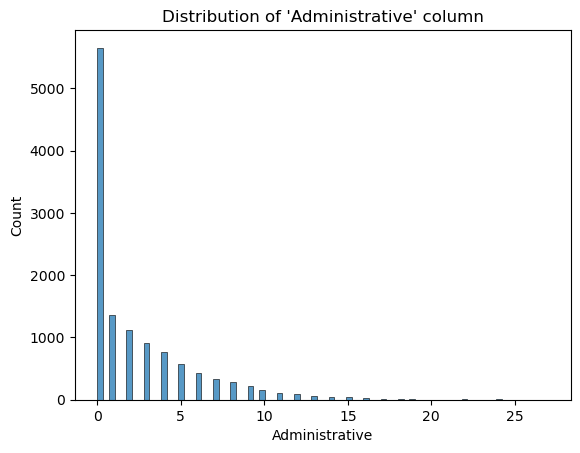

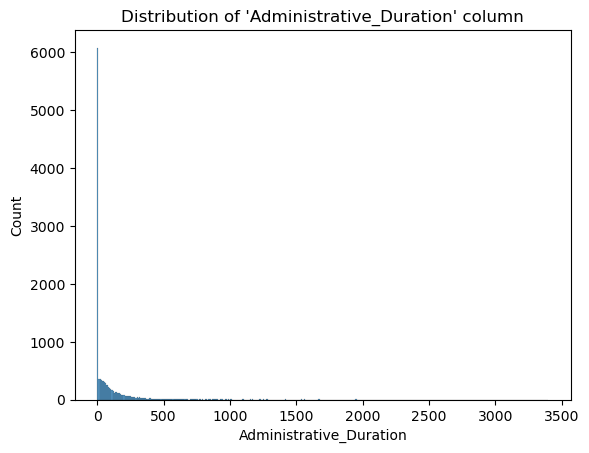

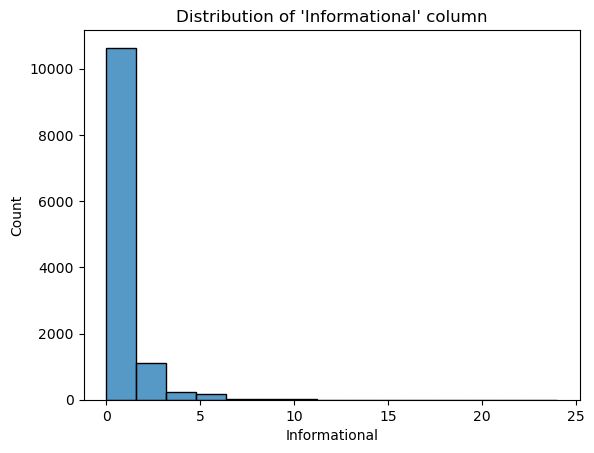

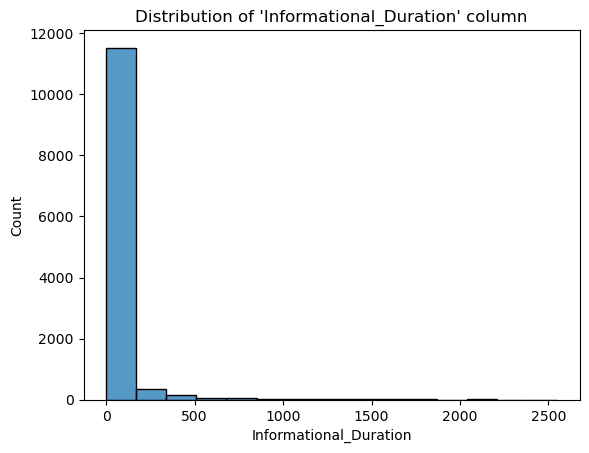

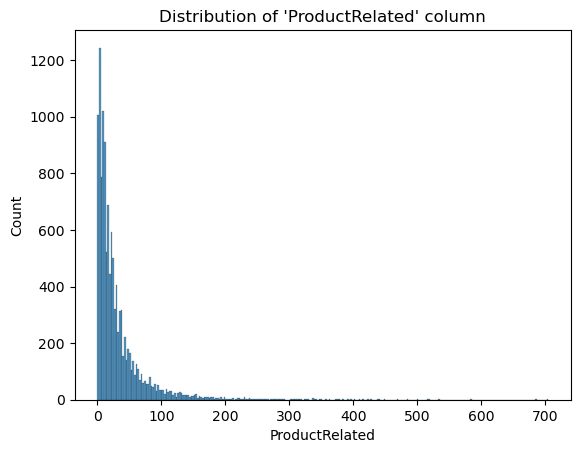

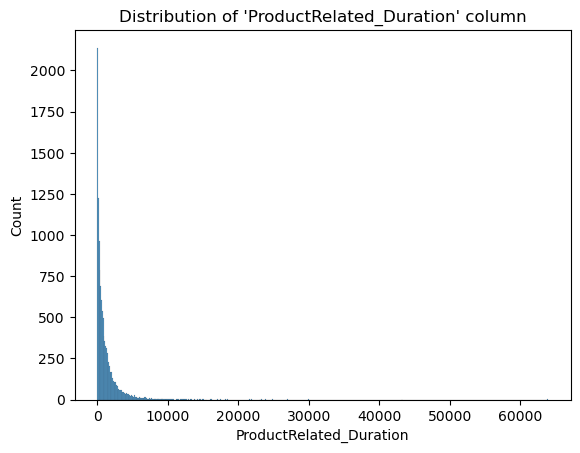

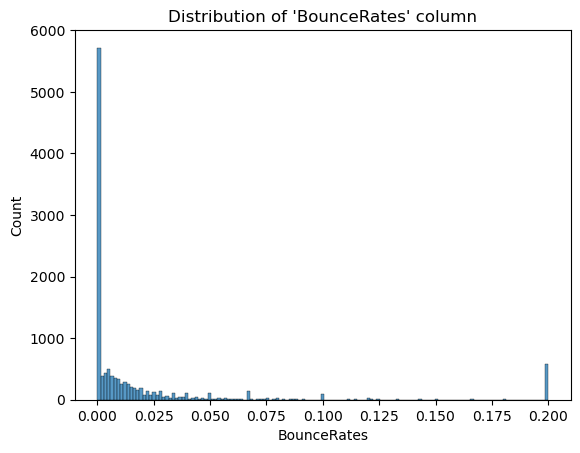

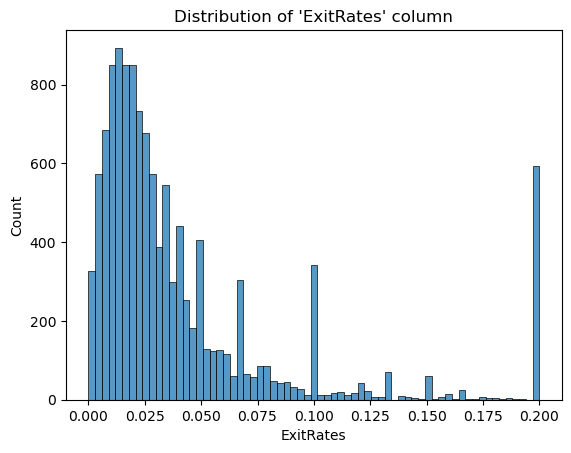

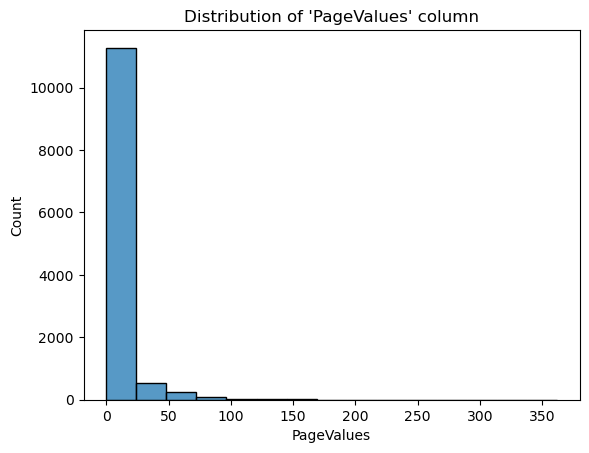

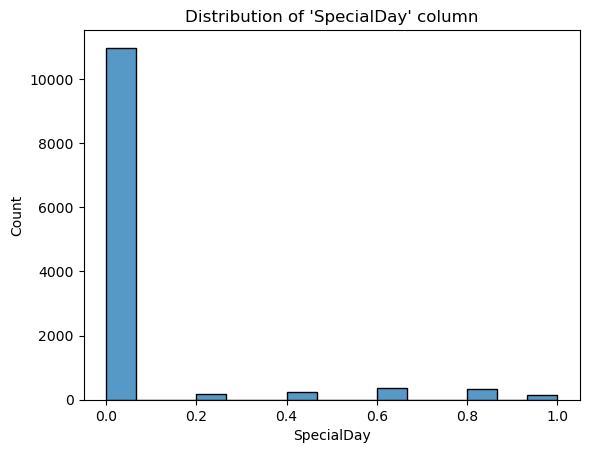

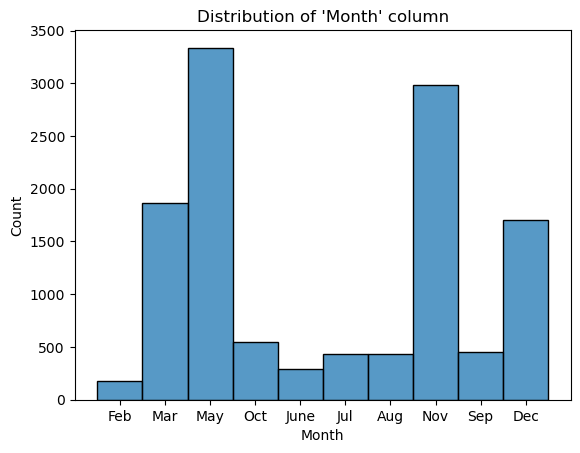

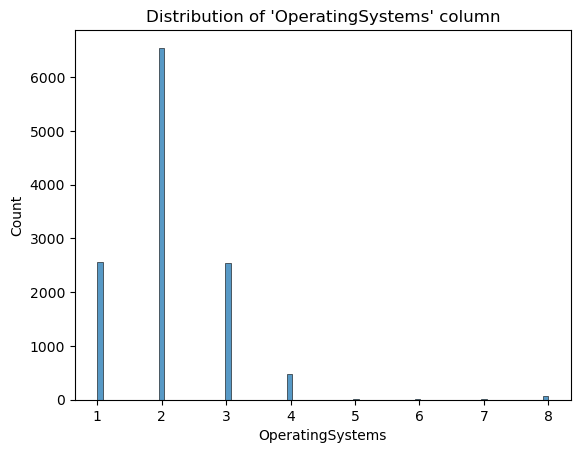

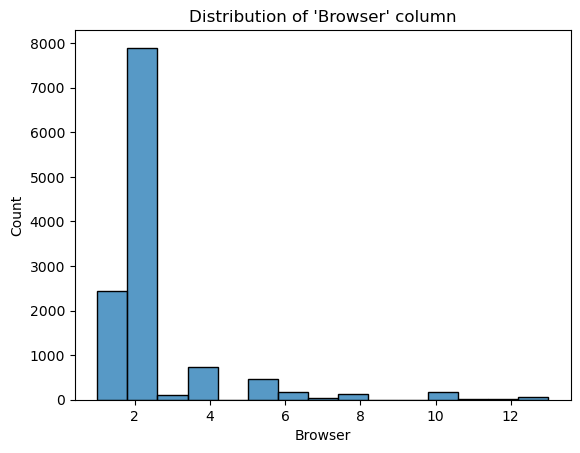

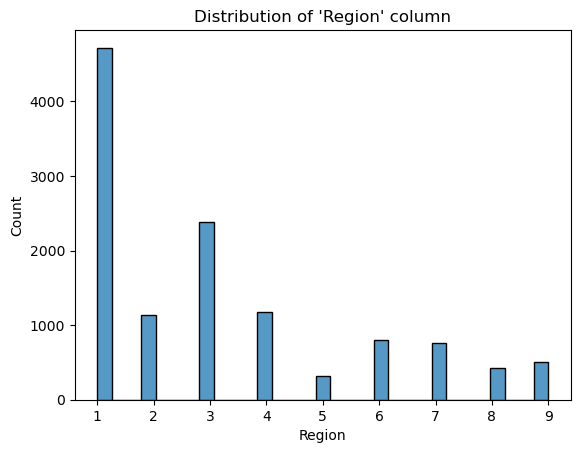

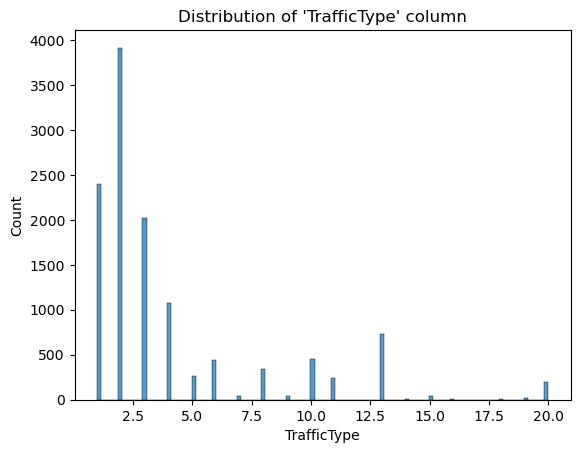

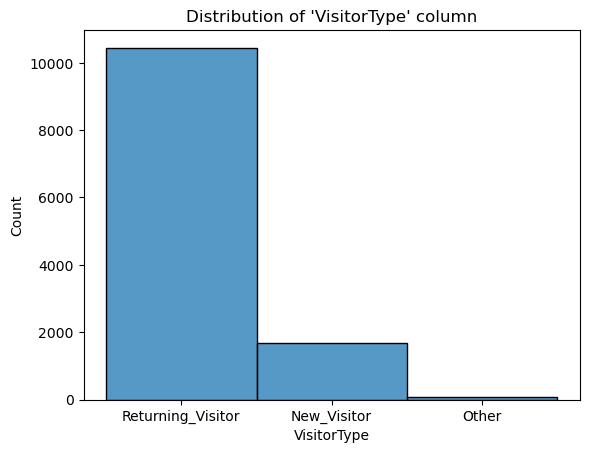

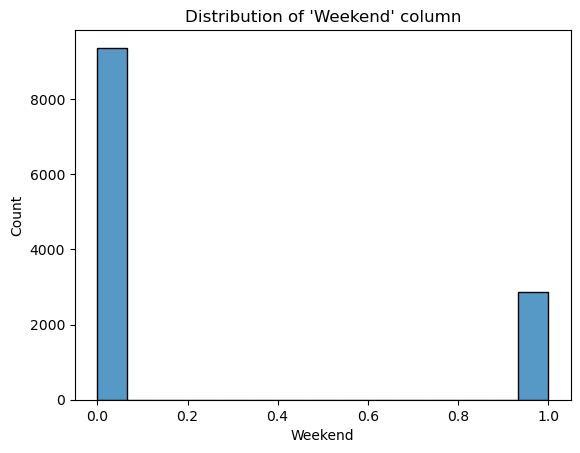

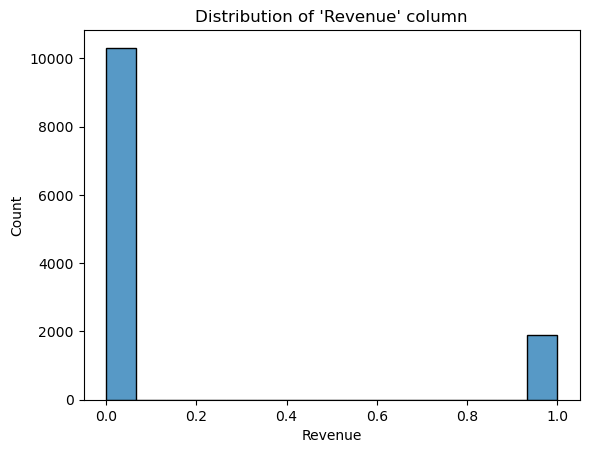

In [49]:
# Get list of column names
df_col_names = list(df.columns)

# Function to plot histplot of all columns
def plot_bar_charts(data, col):
    sns.histplot(data=data, x=col).set_title(f"Distribution of '{col}' column")
    plt.show()
    
# Plot all columns
for col in df_col_names:
    plot_bar_charts(df, col)

### Up to this point, we can see that the distributions for the numerical variables are extremely right skewed.

## Let's check the number of samples that are outliers using the IQR method


Analysis for Administrative:
  Outliers: 404 (3.30%)
  Min: 0.0000
  Max: 27.0000
  Mean: 2.3372
  Median: 1.0000
  Skewness: 1.9479


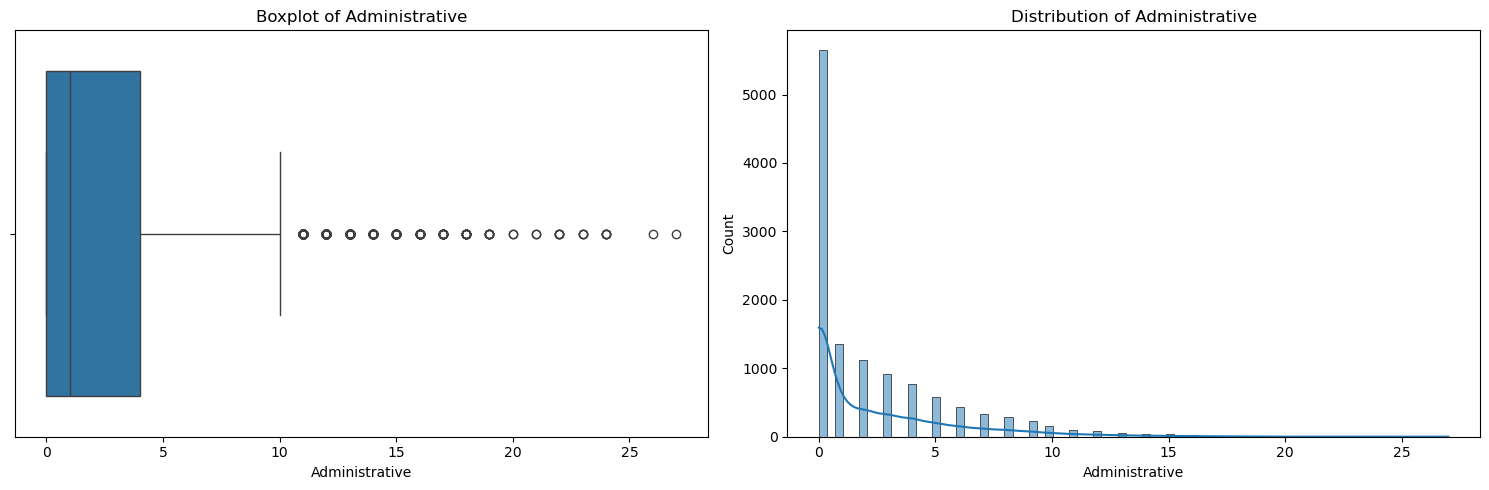


Analysis for Administrative_Duration:
  Outliers: 1150 (9.41%)
  Min: 0.0000
  Max: 3398.7500
  Mean: 81.5385
  Median: 9.0000
  Skewness: 5.5960


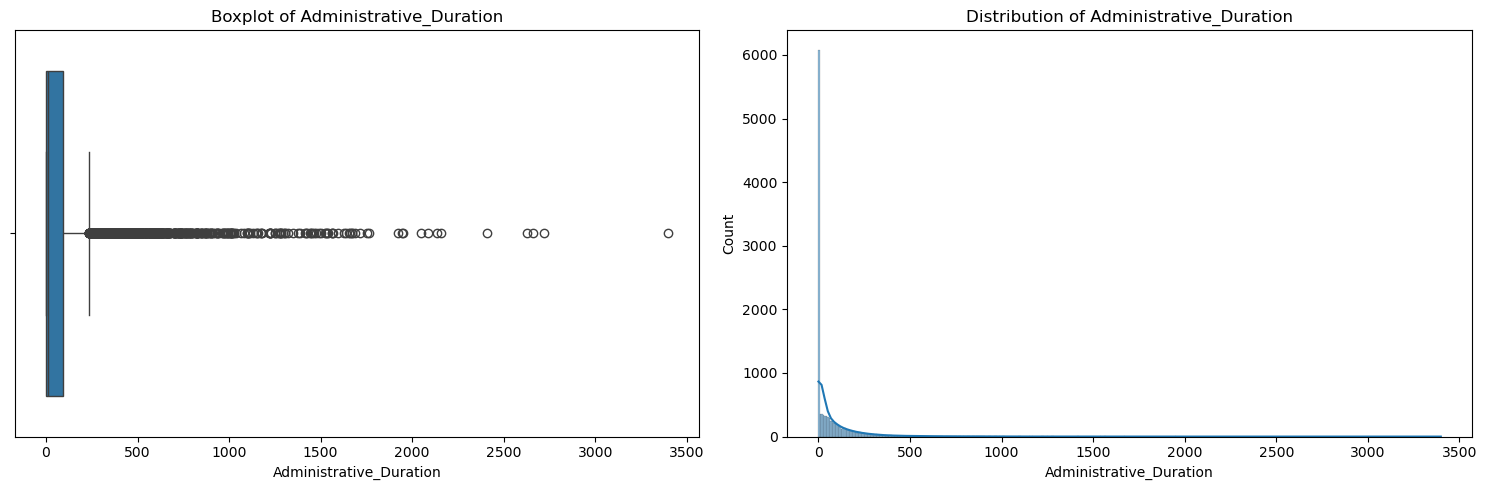


Analysis for Informational:
  Outliers: 2634 (21.55%)
  Min: 0.0000
  Max: 24.0000
  Mean: 0.5084
  Median: 0.0000
  Skewness: 4.0150


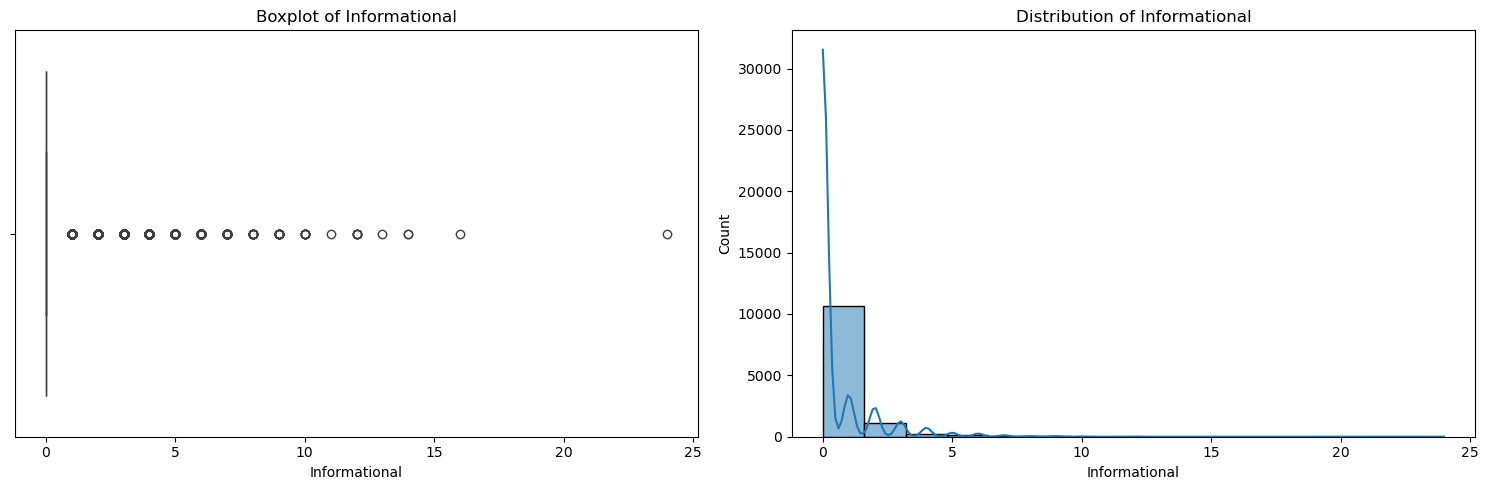


Analysis for Informational_Duration:
  Outliers: 2408 (19.70%)
  Min: 0.0000
  Max: 2549.3750
  Mean: 34.7761
  Median: 0.0000
  Skewness: 7.5463


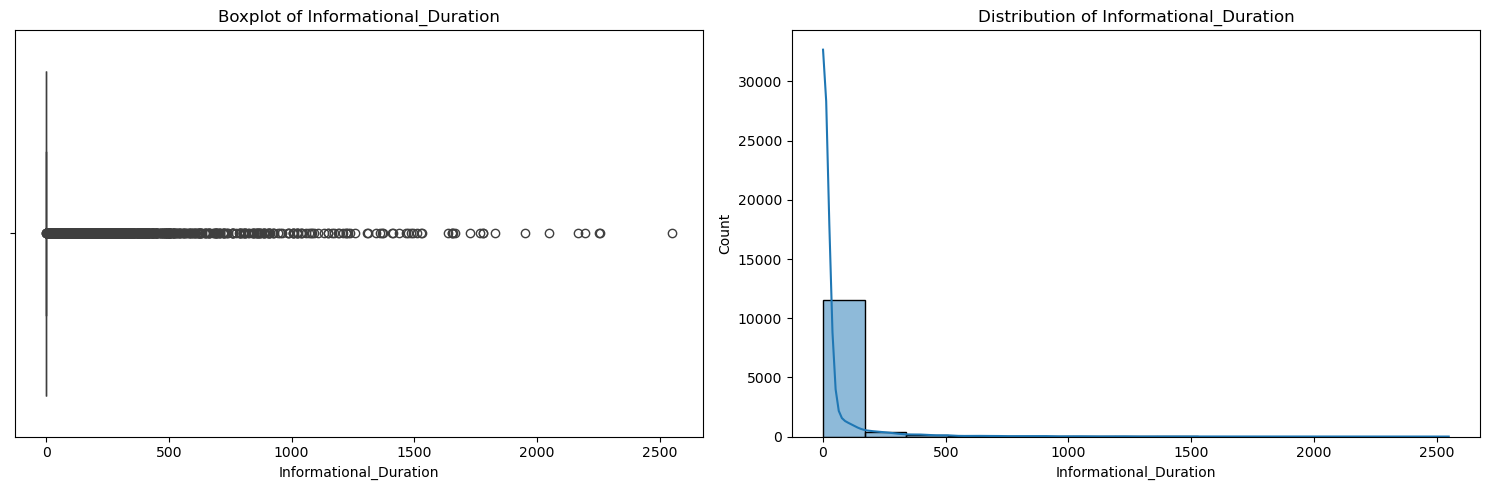


Analysis for ProductRelated:
  Outliers: 1008 (8.25%)
  Min: 0.0000
  Max: 705.0000
  Mean: 32.0268
  Median: 18.0000
  Skewness: 4.3339


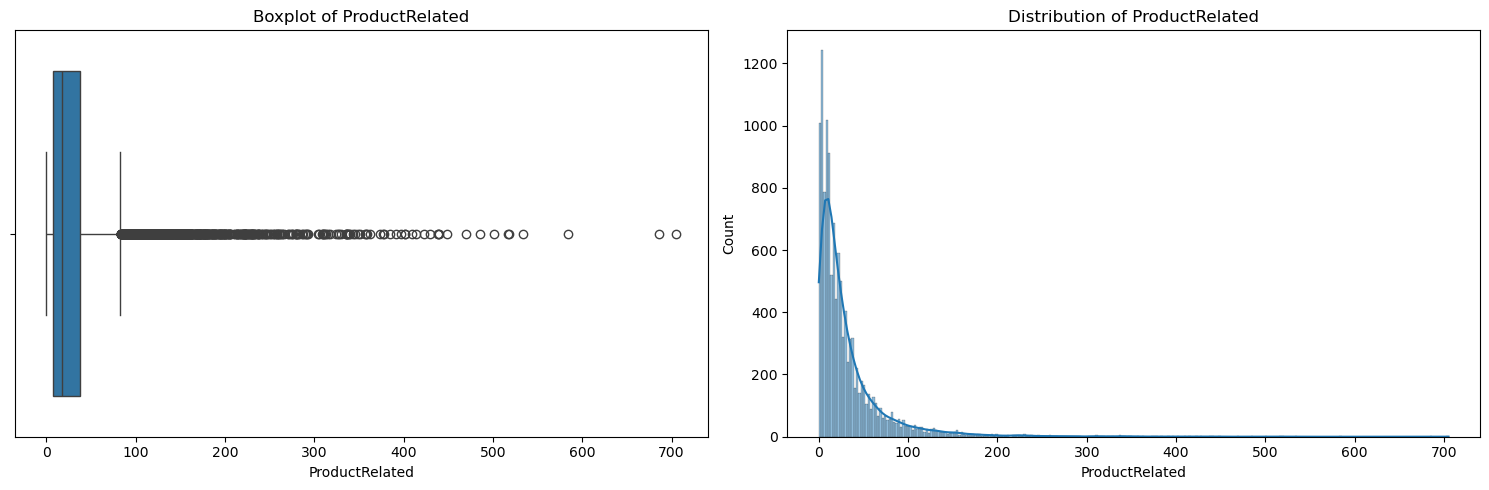


Analysis for ProductRelated_Duration:
  Outliers: 952 (7.79%)
  Min: 0.0000
  Max: 63973.5222
  Mean: 1206.2275
  Median: 608.4083
  Skewness: 7.2523


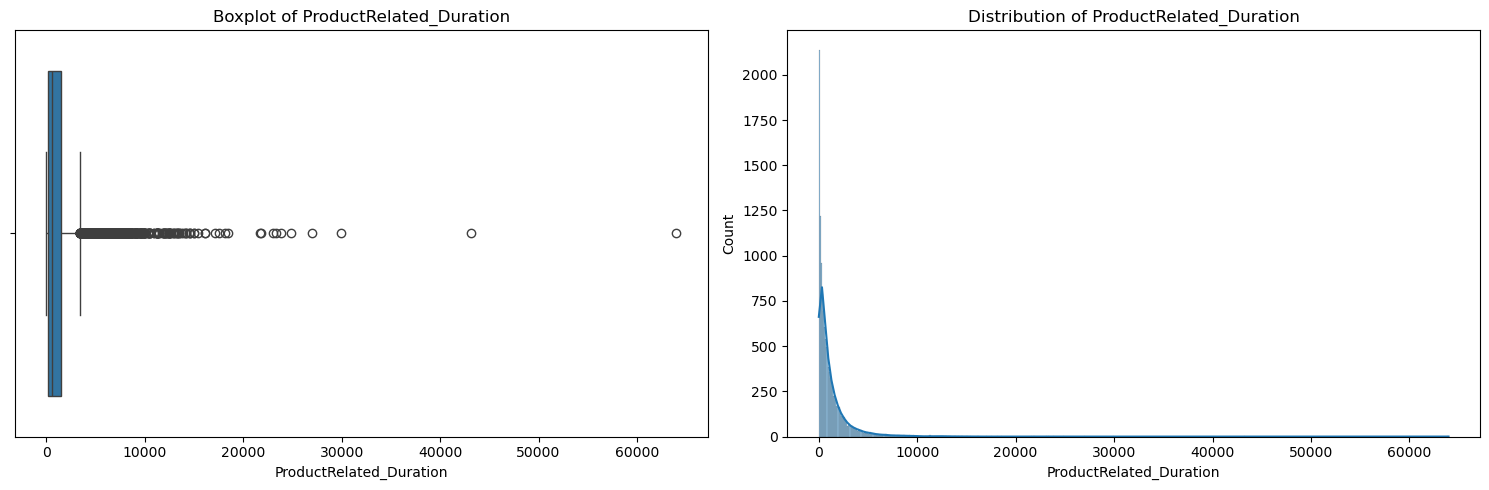


Analysis for BounceRates:
  Outliers: 1437 (11.76%)
  Min: 0.0000
  Max: 0.2000
  Mean: 0.0205
  Median: 0.0029
  Skewness: 3.1488


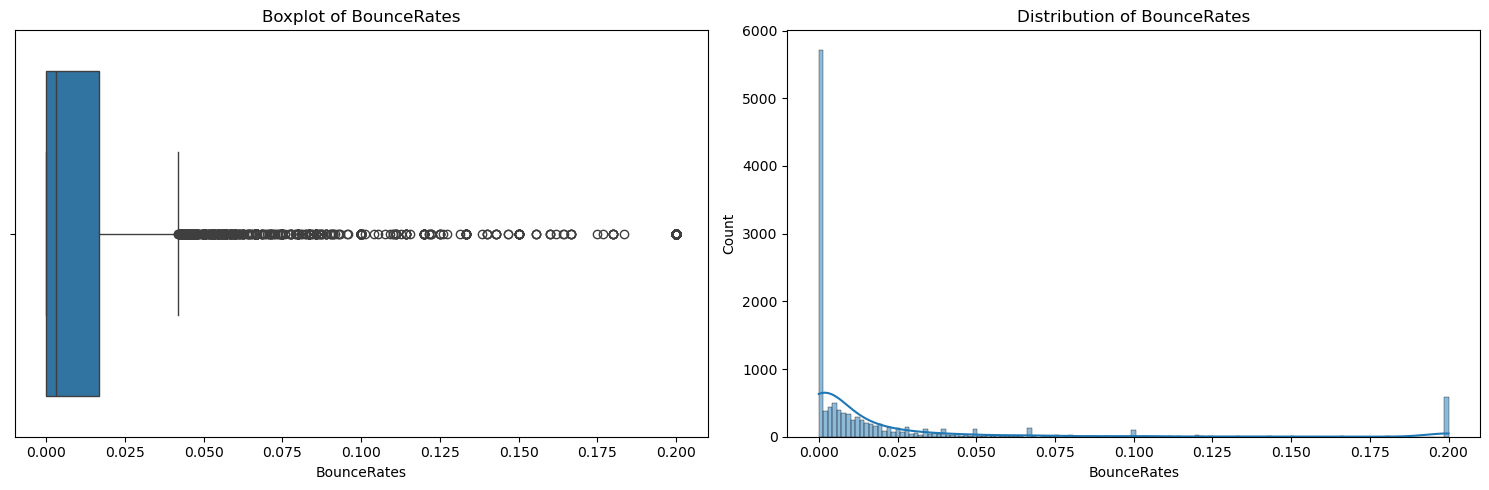


Analysis for ExitRates:
  Outliers: 996 (8.15%)
  Min: 0.0000
  Max: 0.2000
  Mean: 0.0416
  Median: 0.0250
  Skewness: 2.2293


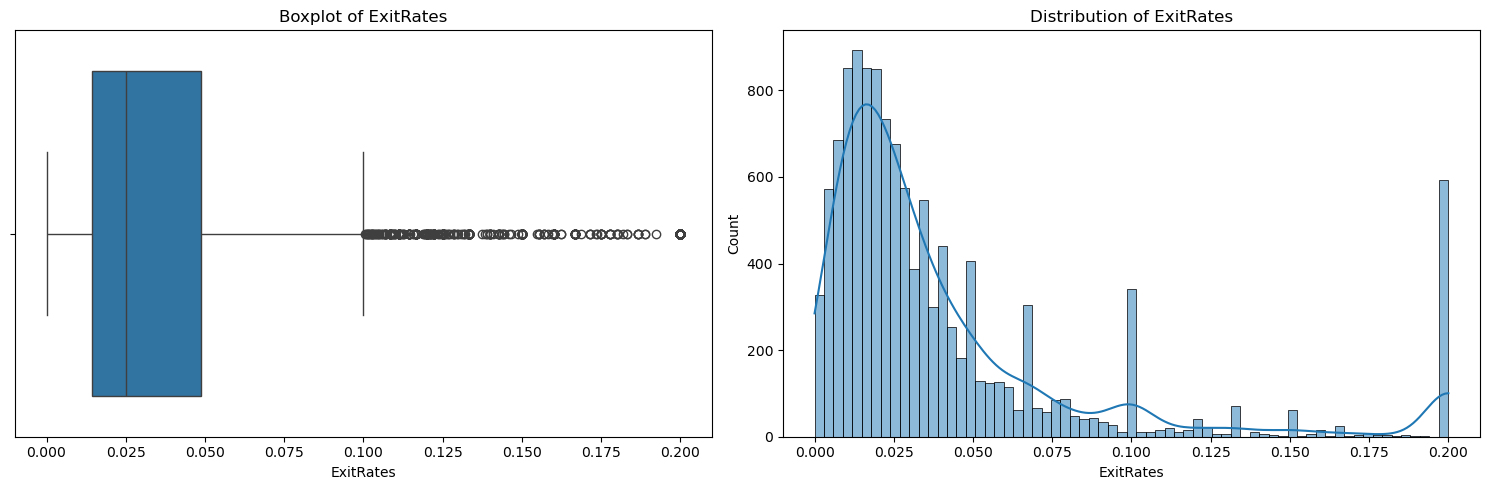


Analysis for PageValues:
  Outliers: 2600 (21.27%)
  Min: 0.0000
  Max: 361.7637
  Mean: 5.6279
  Median: 0.0000
  Skewness: 6.6148


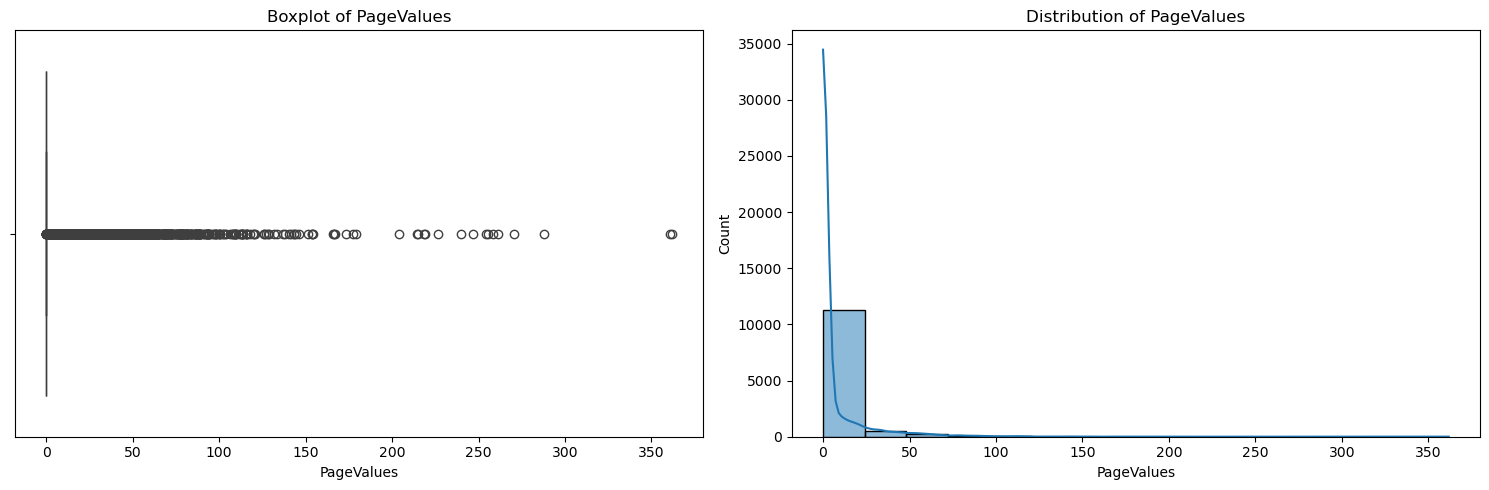


Analysis for SpecialDay:
  Outliers: 1252 (10.24%)
  Min: 0.0000
  Max: 1.0000
  Mean: 0.0620
  Median: 0.0000
  Skewness: 3.2836


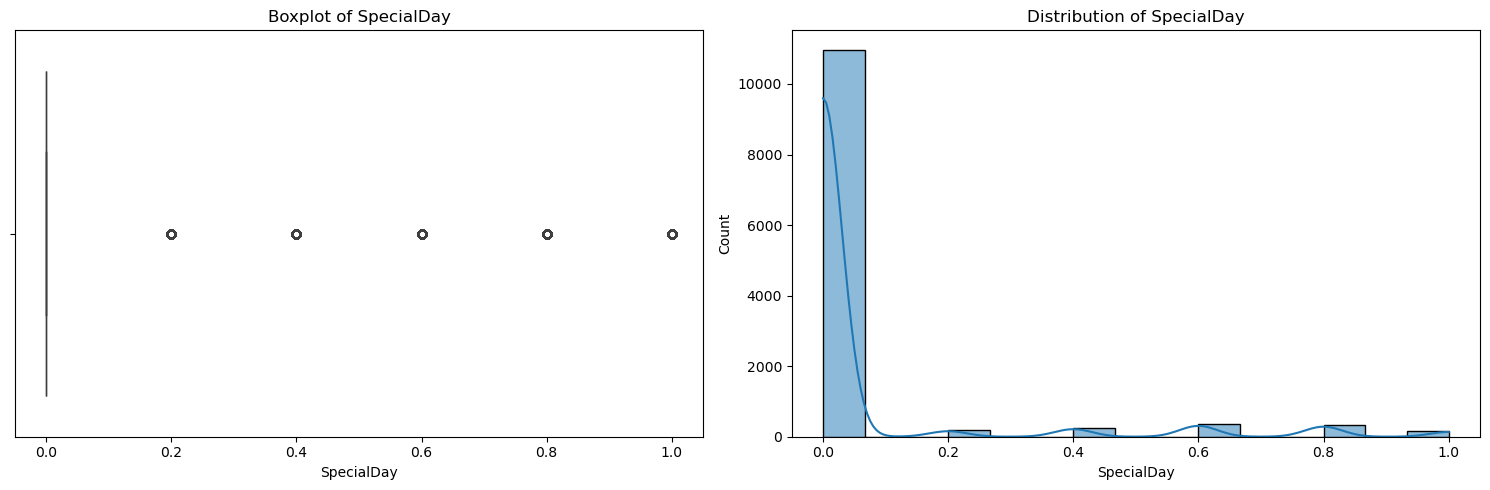


Total samples with at least one outlier: 6897
Percentage of samples with outliers: 56.42%


In [40]:
# List of specified numerical variables
numerical_vars = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound))

# Analyze each numerical variable
for col in numerical_vars:
    outliers = identify_outliers(df[col])
    
    print(f"\nAnalysis for {col}:")
    print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Skewness: {df[col].skew():.4f}")

    # Create subplot with boxplot and histogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Boxplot
    sns.boxplot(x=df[col], ax=ax1)
    ax1.set_title(f'Boxplot of {col}')
    ax1.set_xlabel(col)
    
    # Histogram
    sns.histplot(df[col], kde=True, ax=ax2)
    ax2.set_title(f'Distribution of {col}')
    ax2.set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

# Calculate total samples with outliers
samples_with_outliers = df[numerical_vars].apply(identify_outliers).any(axis=1)
total_outlier_samples = samples_with_outliers.sum()

print(f"\nTotal samples with at least one outlier: {total_outlier_samples}")
print(f"Percentage of samples with outliers: {(total_outlier_samples / len(df)) * 100:.2f}%")

## There are a lot of outliers in this dataset... what if we try log transformation to try transforming the data to look more like a normal distribution?

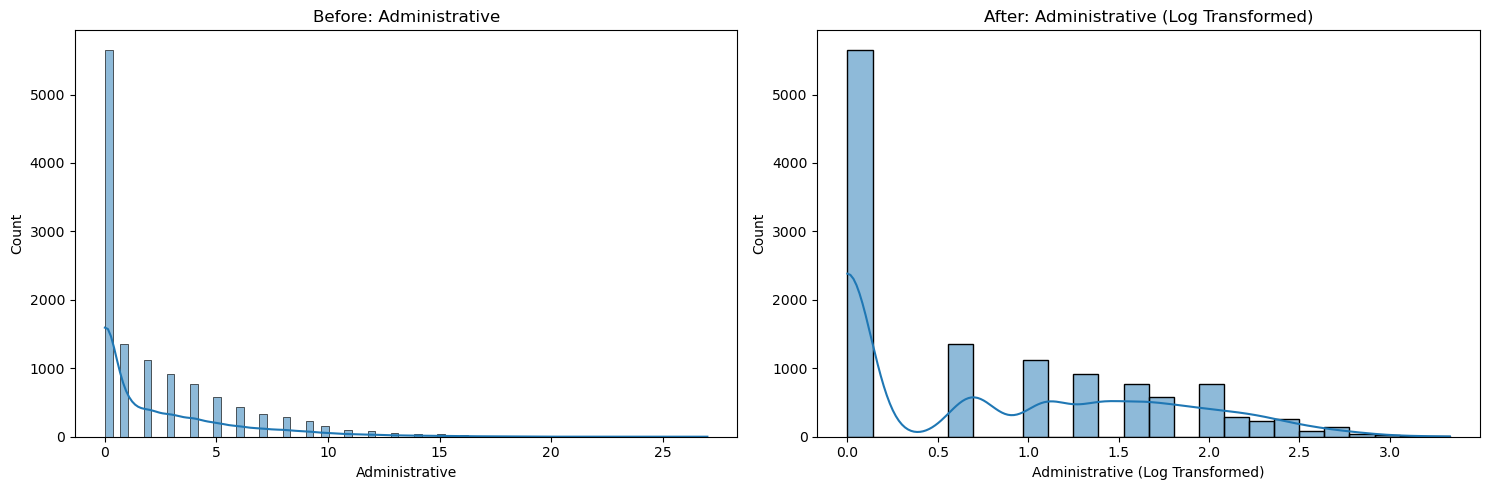

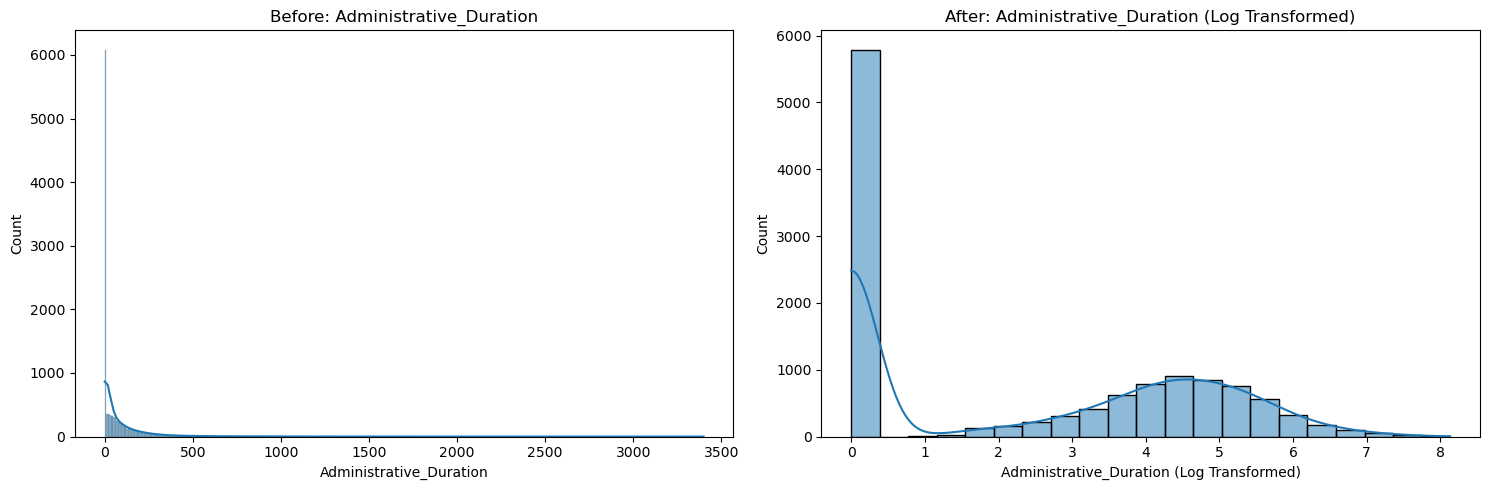

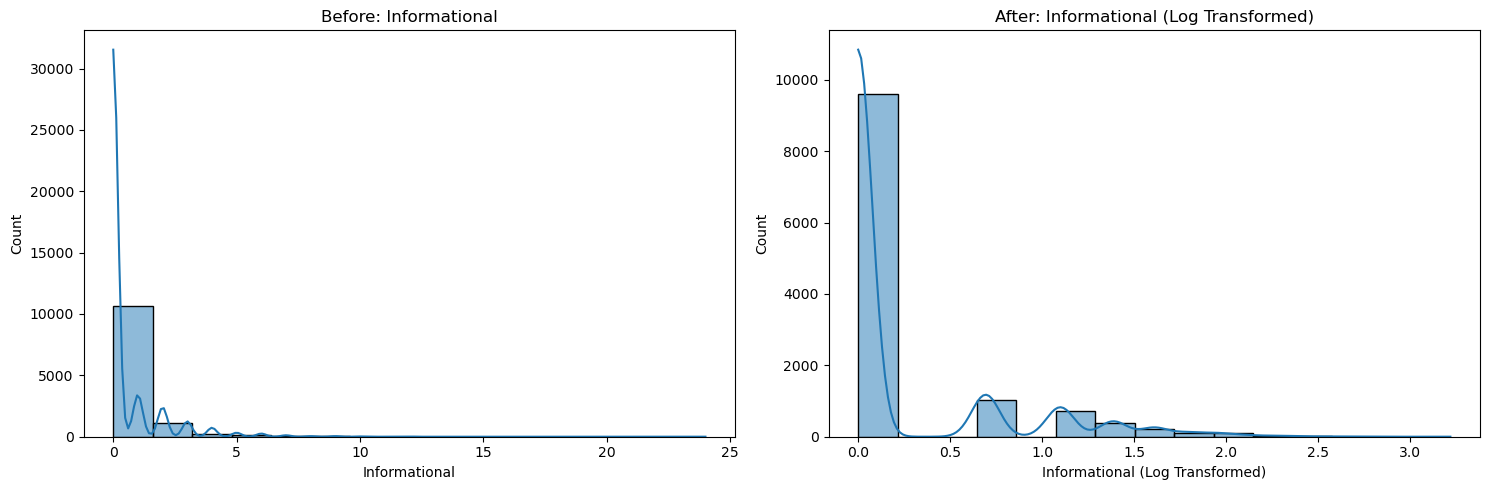

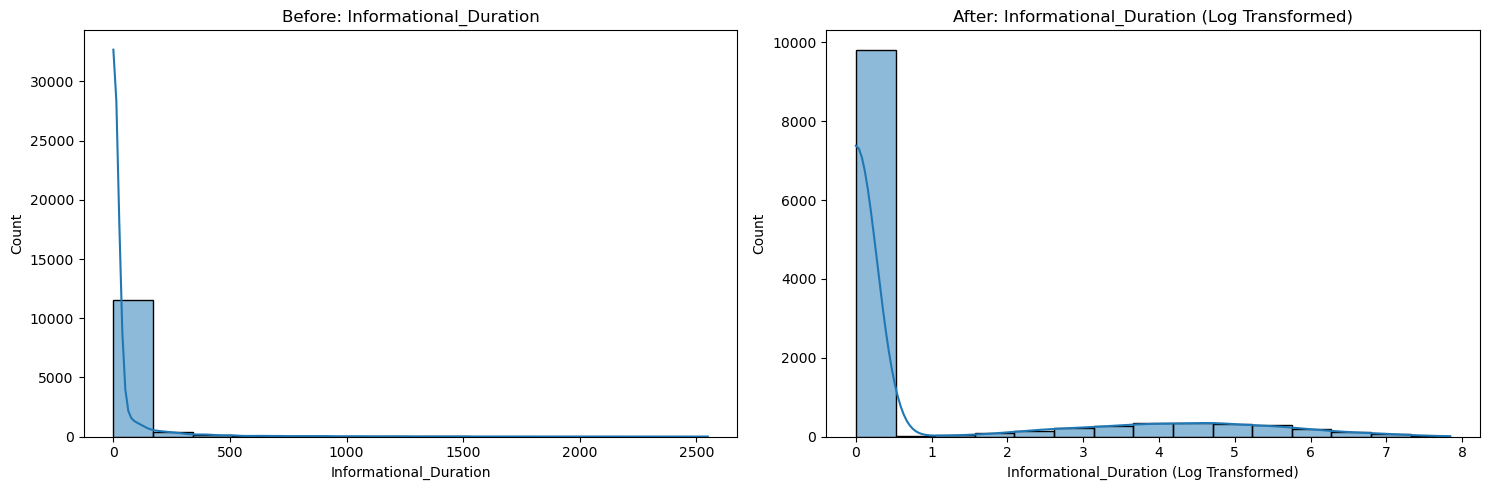

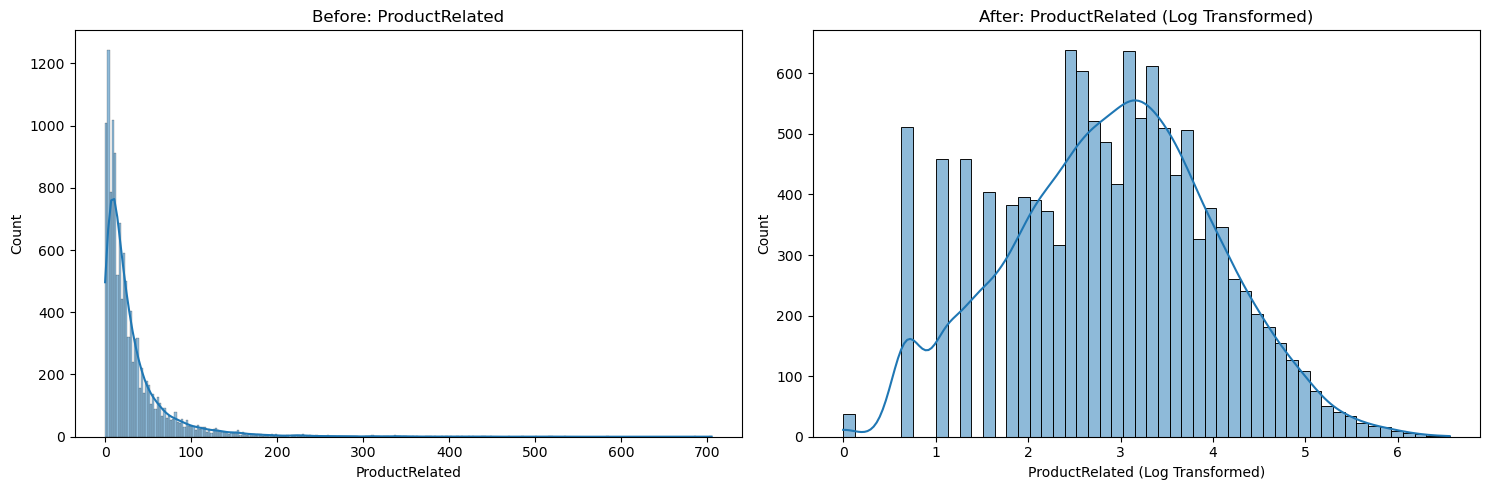

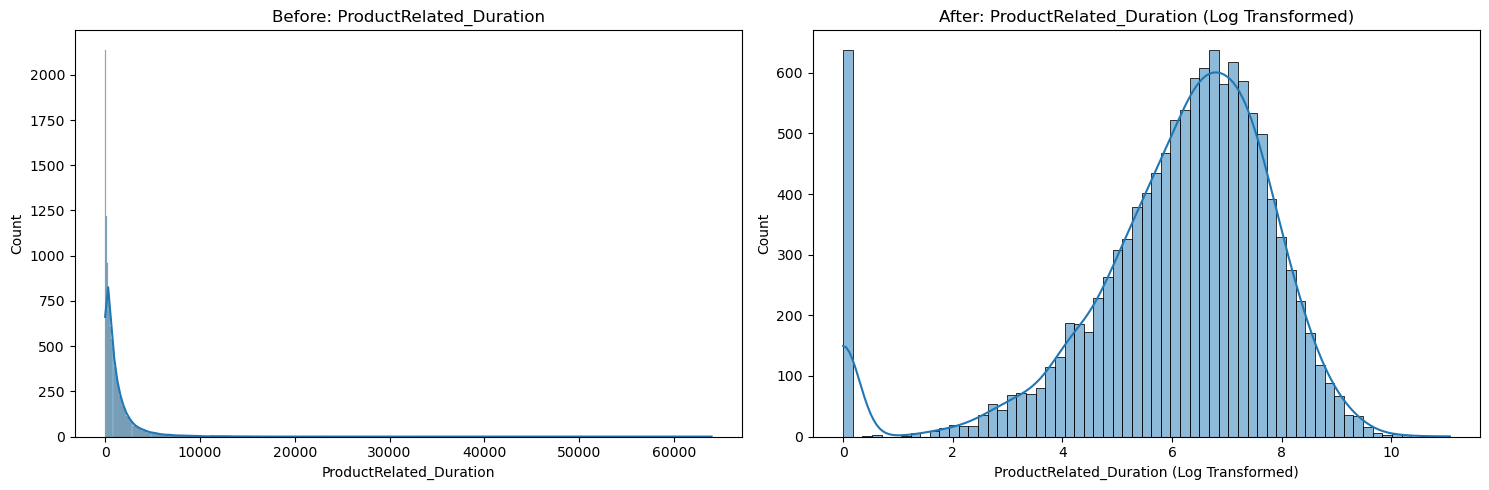

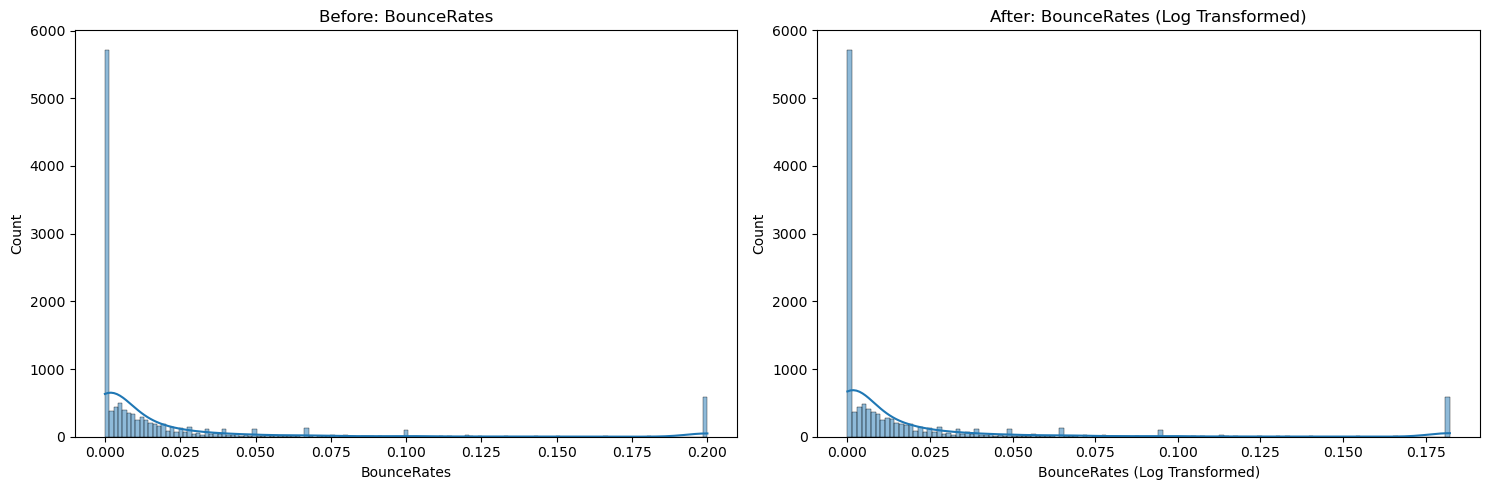

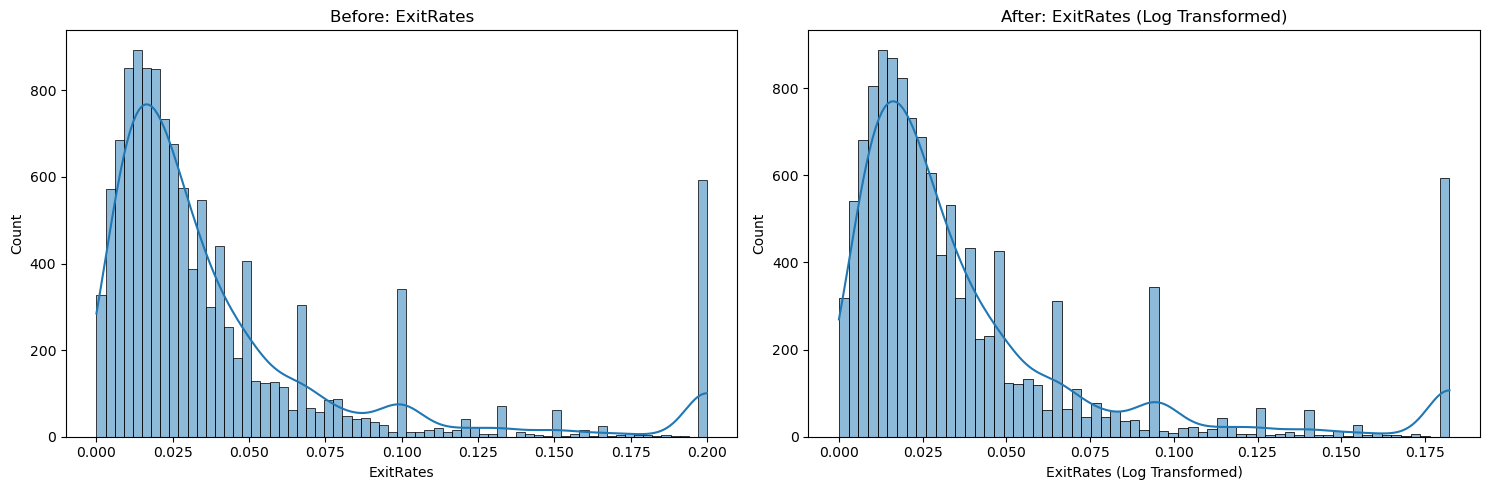

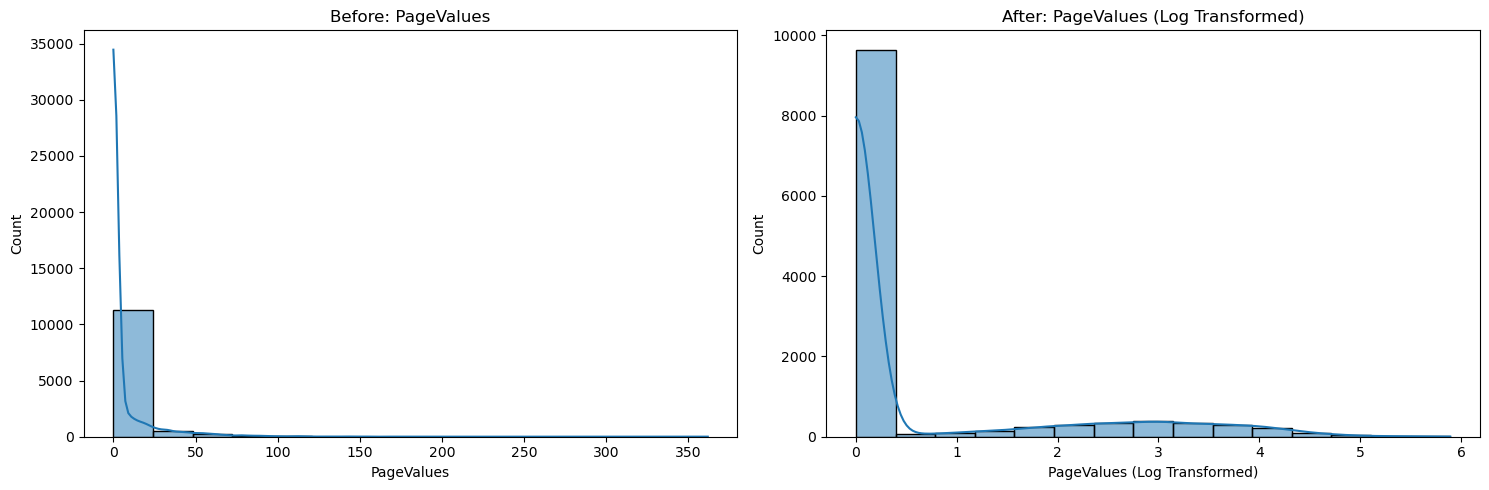

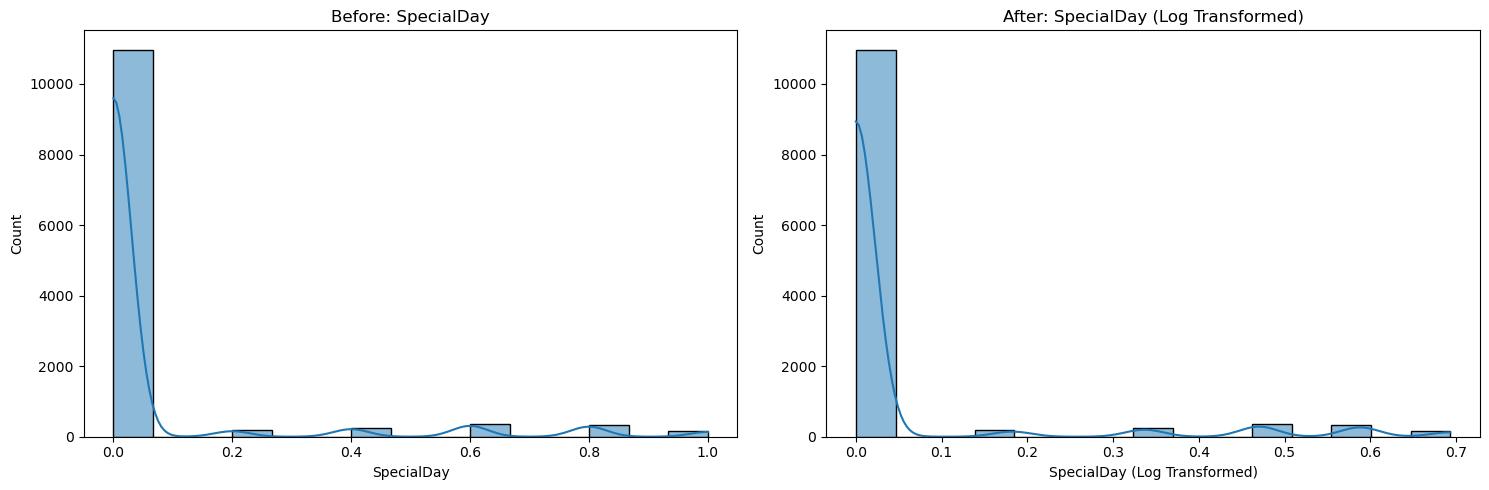

Original Data Summary:
       Administrative  Administrative_Duration  Informational  \
count    12224.000000             12224.000000   12224.000000   
mean         2.337205                81.538531       0.508426   
std          3.329096               177.376839       1.274972   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.600000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12224.000000    12224.000000             12224.000000   
mean                34.776085       32.026832              1206.227466   
std                141.320666       44.573409              1918.809457   
min                  0.000000        0.000000                 0.000000   
25%                  

In [38]:
# List of numerical variables
numerical_vars = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

# Function to plot before and after
def plot_before_after(original, transformed, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.histplot(original, kde=True, ax=ax1)
    ax1.set_title(f'Before: {title}')
    ax1.set_xlabel(title)
    
    sns.histplot(transformed, kde=True, ax=ax2)
    ax2.set_title(f'After: {title} (Log Transformed)')
    ax2.set_xlabel(f'{title} (Log Transformed)')
    
    plt.tight_layout()
    plt.show()

# Create a new dataframe for log-transformed features
df_log = df.copy()

# Apply log transformation and plot for each numerical variable
for var in numerical_vars:
    # Apply log transformation (adding 1 to handle zeros)
    df_log[var] = np.log1p(df[var])
    
    # Plot before and after
    plot_before_after(df[var], df_log[var], var)

# Print summary statistics for original and log-transformed data
print("Original Data Summary:")
print(df[numerical_vars].describe())
print("\nLog-Transformed Data Summary:")
print(df_log[numerical_vars].describe())

### Visualisations above don't really change much (or even at all) when comparing to pre-log transformation and post log transfomation... Let's confirm if the number of outliers has indeed changed


Analysis for Administrative after log transformation:
  Outliers: 404 (3.30%)
  Min: 0.0000
  Max: 27.0000
  Mean: 2.3372
  Median: 1.0000
  Skewness: 1.9479


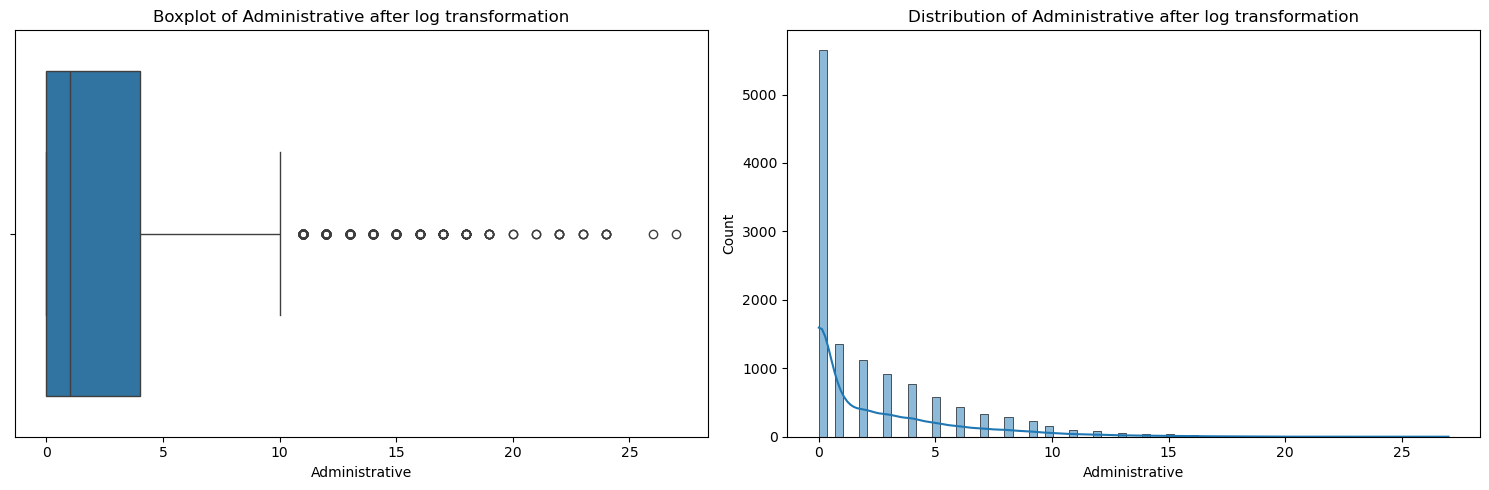


Analysis for Administrative_Duration after log transformation:
  Outliers: 1150 (9.41%)
  Min: 0.0000
  Max: 3398.7500
  Mean: 81.5385
  Median: 9.0000
  Skewness: 5.5960


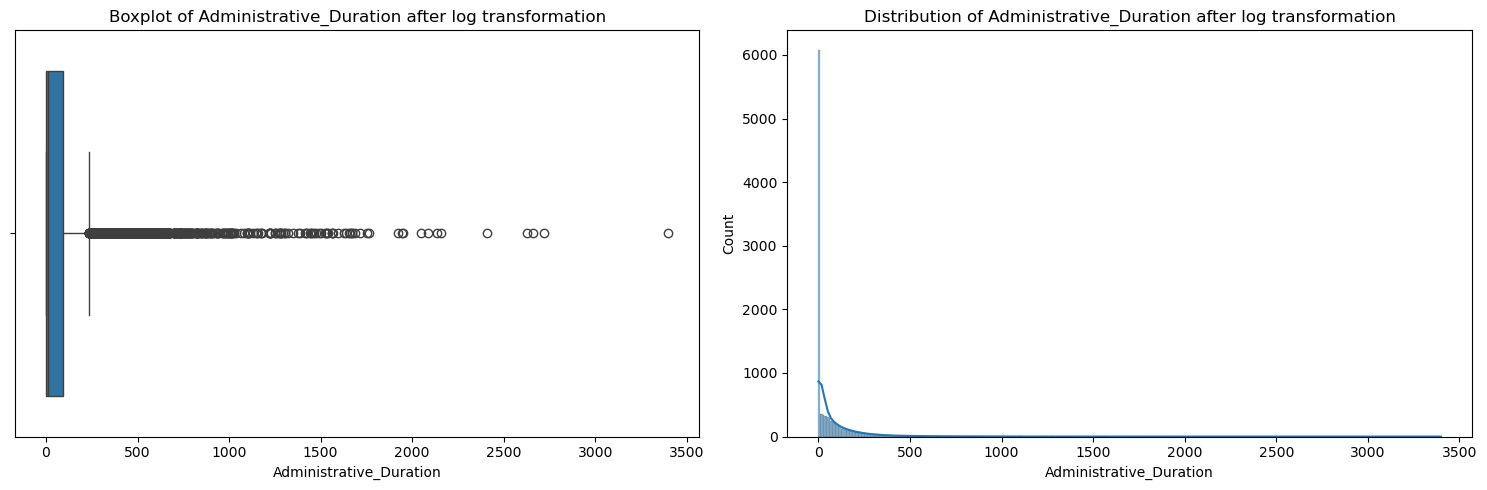


Analysis for Informational after log transformation:
  Outliers: 2634 (21.55%)
  Min: 0.0000
  Max: 24.0000
  Mean: 0.5084
  Median: 0.0000
  Skewness: 4.0150


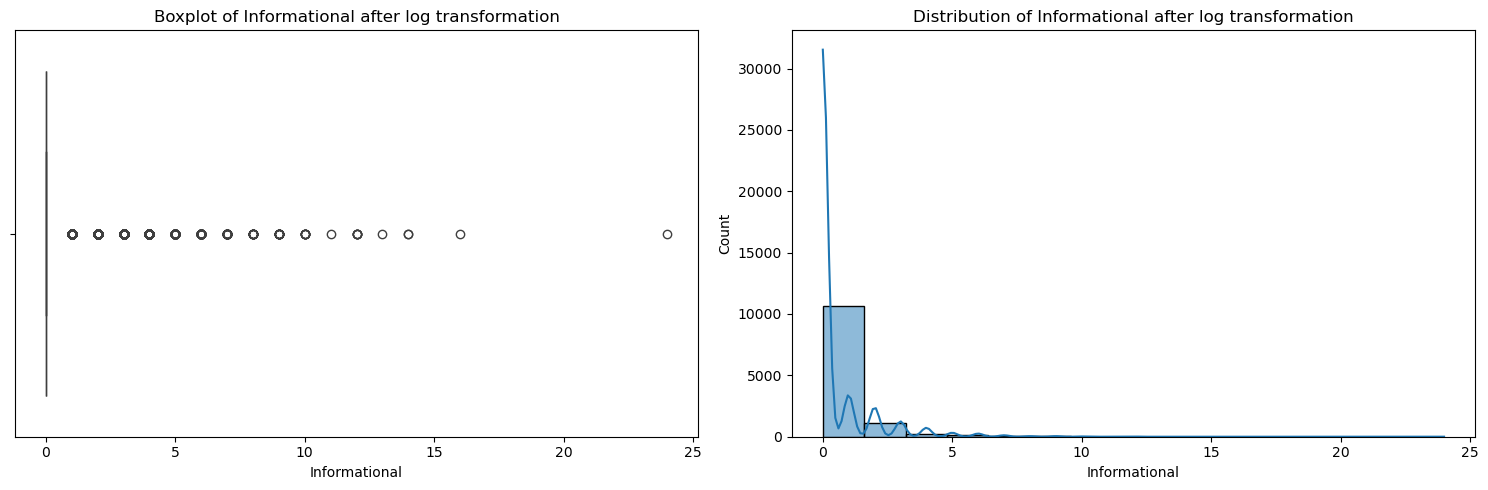


Analysis for Informational_Duration after log transformation:
  Outliers: 2408 (19.70%)
  Min: 0.0000
  Max: 2549.3750
  Mean: 34.7761
  Median: 0.0000
  Skewness: 7.5463


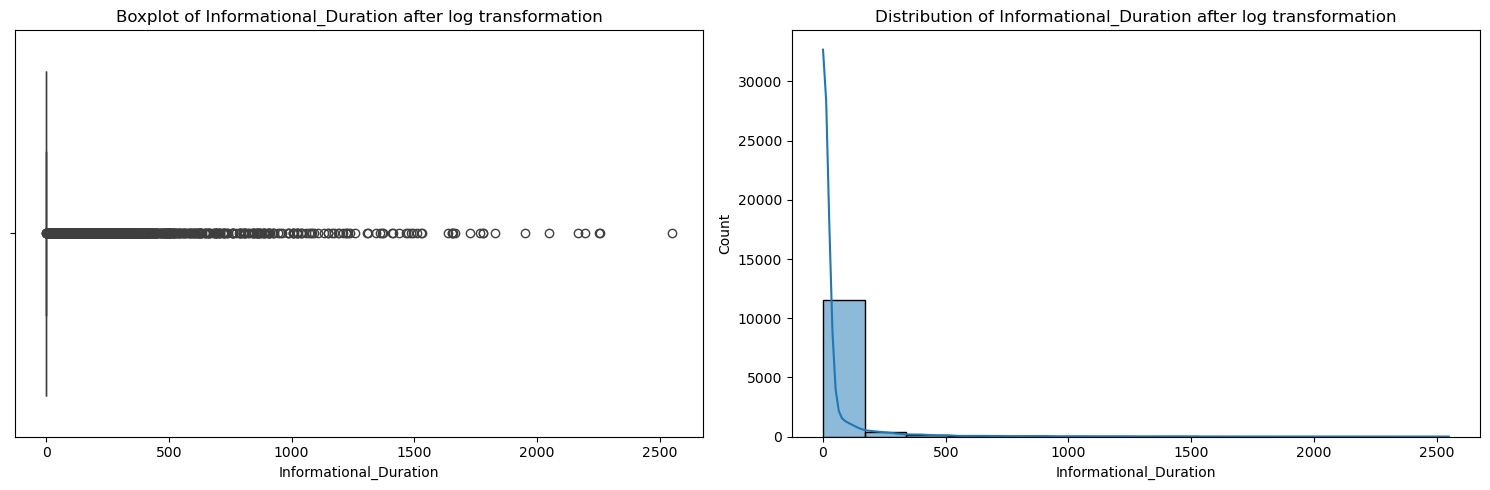


Analysis for ProductRelated after log transformation:
  Outliers: 1008 (8.25%)
  Min: 0.0000
  Max: 705.0000
  Mean: 32.0268
  Median: 18.0000
  Skewness: 4.3339


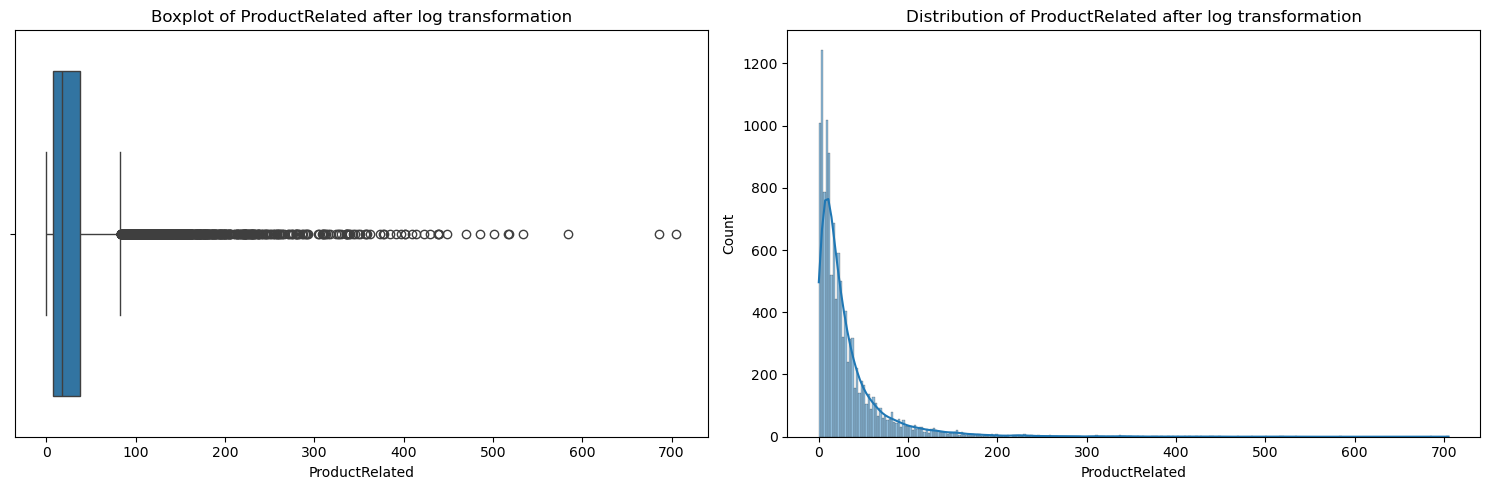


Analysis for ProductRelated_Duration after log transformation:
  Outliers: 952 (7.79%)
  Min: 0.0000
  Max: 63973.5222
  Mean: 1206.2275
  Median: 608.4083
  Skewness: 7.2523


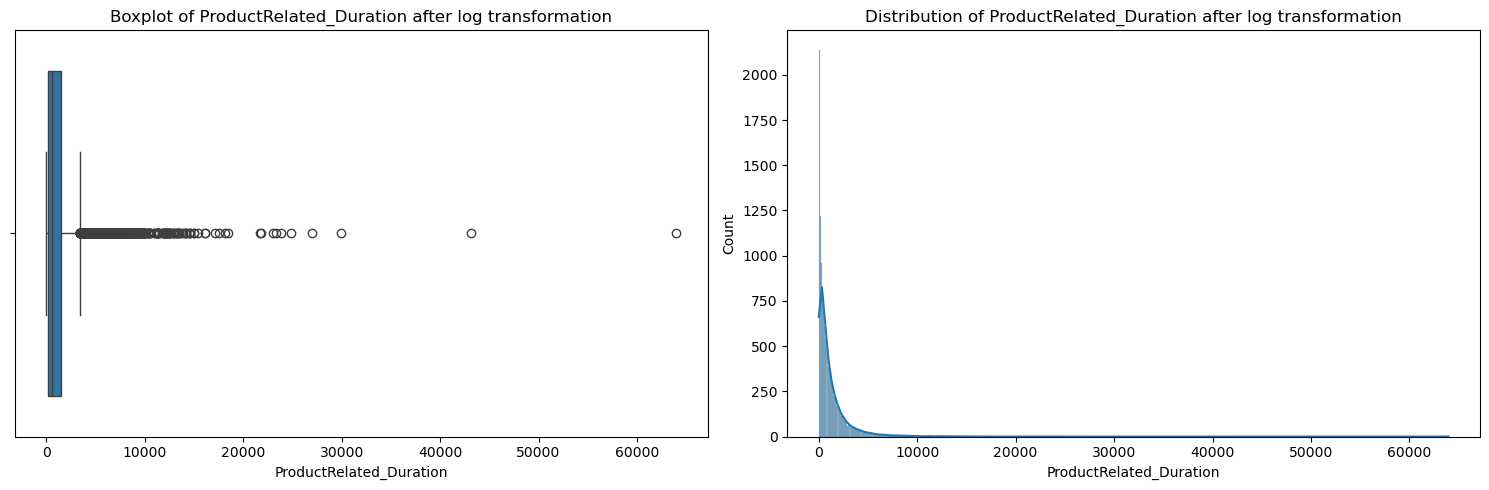


Analysis for BounceRates after log transformation:
  Outliers: 1437 (11.76%)
  Min: 0.0000
  Max: 0.2000
  Mean: 0.0205
  Median: 0.0029
  Skewness: 3.1488


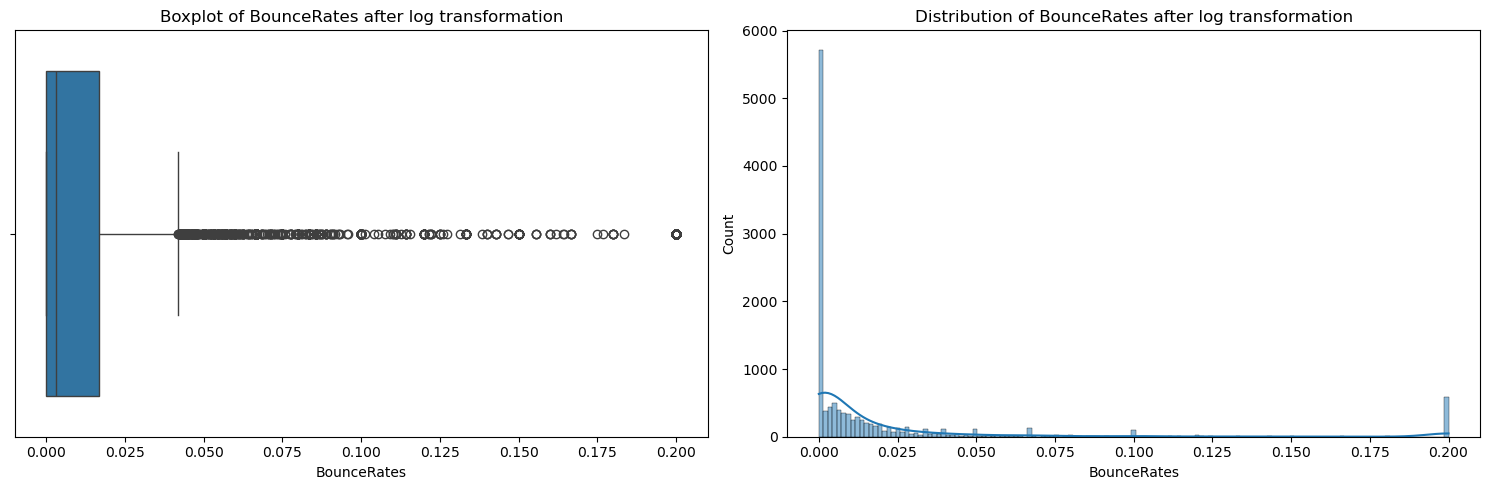


Analysis for ExitRates after log transformation:
  Outliers: 996 (8.15%)
  Min: 0.0000
  Max: 0.2000
  Mean: 0.0416
  Median: 0.0250
  Skewness: 2.2293


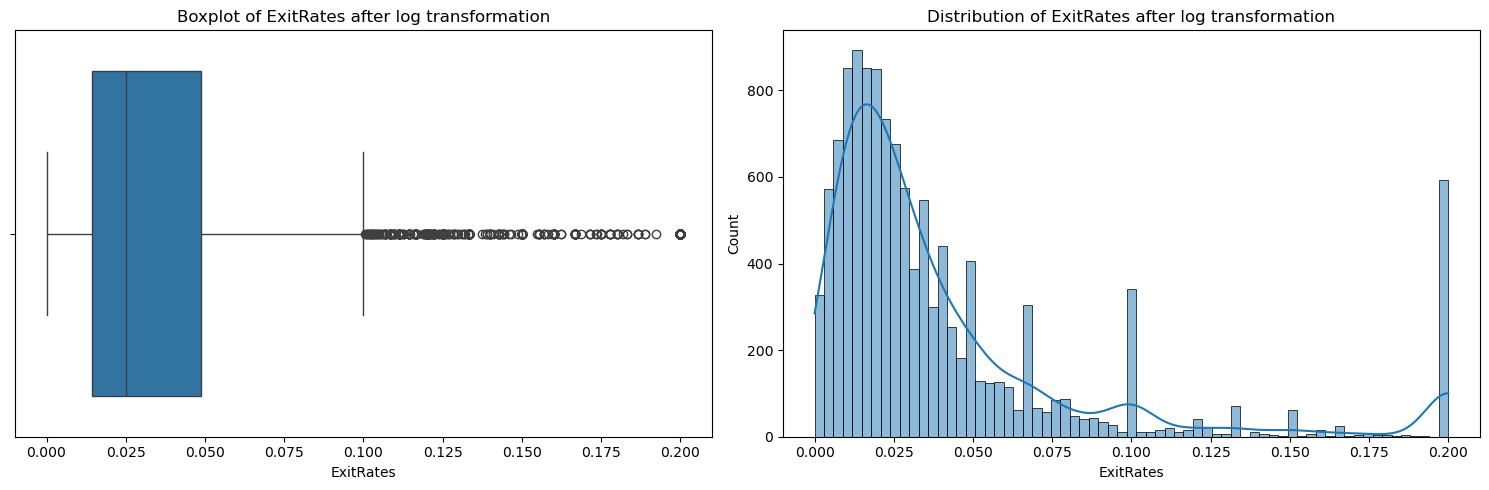


Analysis for PageValues after log transformation:
  Outliers: 2600 (21.27%)
  Min: 0.0000
  Max: 361.7637
  Mean: 5.6279
  Median: 0.0000
  Skewness: 6.6148


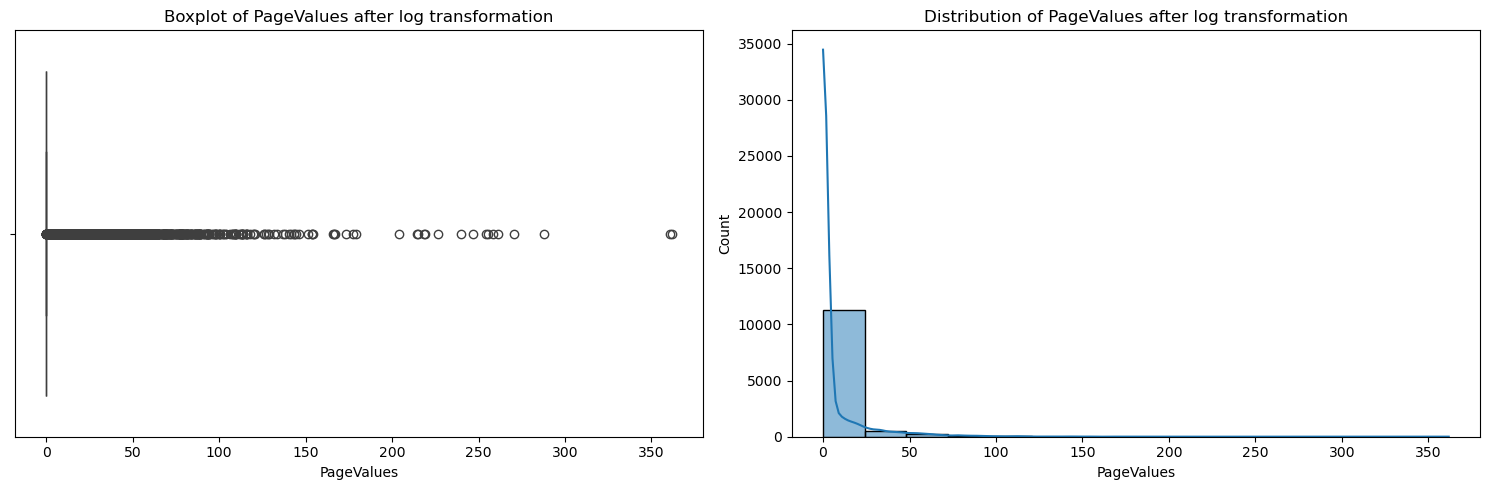


Analysis for SpecialDay after log transformation:
  Outliers: 1252 (10.24%)
  Min: 0.0000
  Max: 1.0000
  Mean: 0.0620
  Median: 0.0000
  Skewness: 3.2836


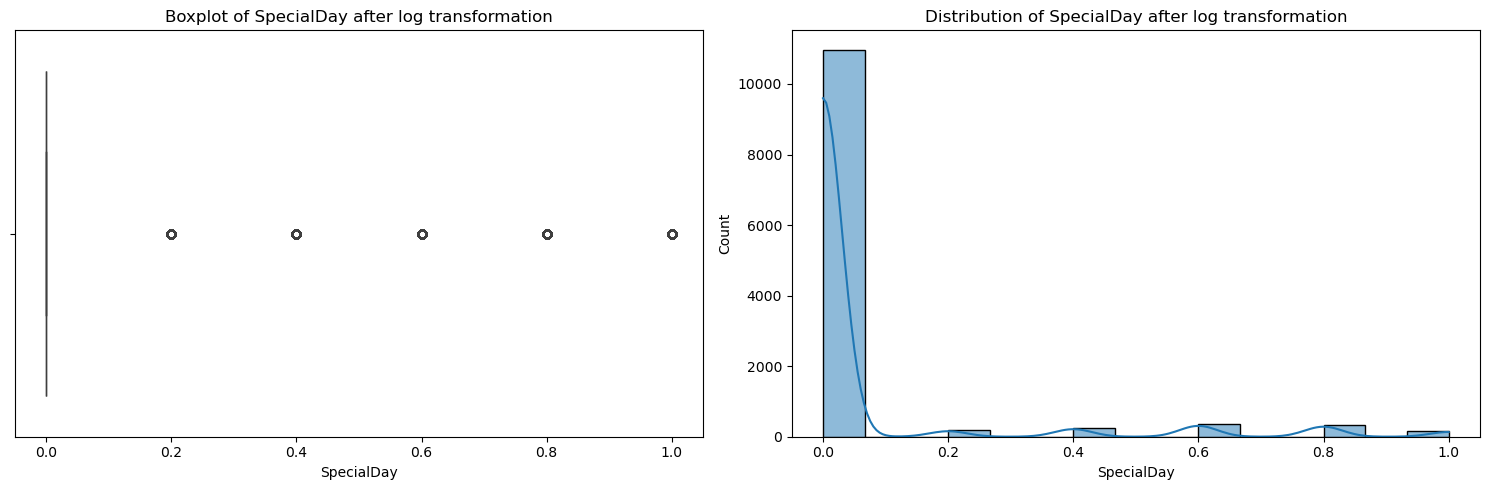


Total samples with at least one outlier after log transformation: 6335
Percentage of samples with outliers after log transformation: 51.82%


In [41]:
# List of specified numerical variables
numerical_vars = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound))

# Analyze each numerical variable
for col in numerical_vars:
    outliers = identify_outliers(df[col])
    
    print(f"\nAnalysis for {col} after log transformation:")
    print(f"  Outliers: {outliers.sum()} ({outliers.sum() / len(df) * 100:.2f}%)")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Skewness: {df[col].skew():.4f}")

    # Create subplot with boxplot and histogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Boxplot
    sns.boxplot(x=df[col], ax=ax1)
    ax1.set_title(f'Boxplot of {col} after log transformation')
    ax1.set_xlabel(col)
    
    # Histogram
    sns.histplot(df[col], kde=True, ax=ax2)
    ax2.set_title(f'Distribution of {col} after log transformation')
    ax2.set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

# Calculate total samples with outliers
samples_with_outliers = df_log[numerical_vars].apply(identify_outliers).any(axis=1)
total_outlier_samples = samples_with_outliers.sum()

print(f"\nTotal samples with at least one outlier after log transformation: {total_outlier_samples}")
print(f"Percentage of samples with outliers after log transformation: {(total_outlier_samples / len(df_log)) * 100:.2f}%")

The number of outliers has has only reduced slightly by 4-5%... it could be due to the fact that our dataset has too many values with "0" that caused this... 

Outliers could be a notable feature due to the nature of the behaviour of shoppers visiting the website.

It may be best not to delete the outliers as they may be legitimate values.

### It is quite interesting to note that site visits are high in the months of March, May, November, and December.

### It is understood that for May, it could be a preparation for the holidays in June. While for November and December, the visits could be high due to end of year holidays and festivities.

### It is unclear why March has a moderately high visit rate. The dataset's description nor the introductory paper did not describe from which country the data was obtained from. It is postulated that a festival might have happened during March or April.

# Bivariate Analysis

<Axes: >

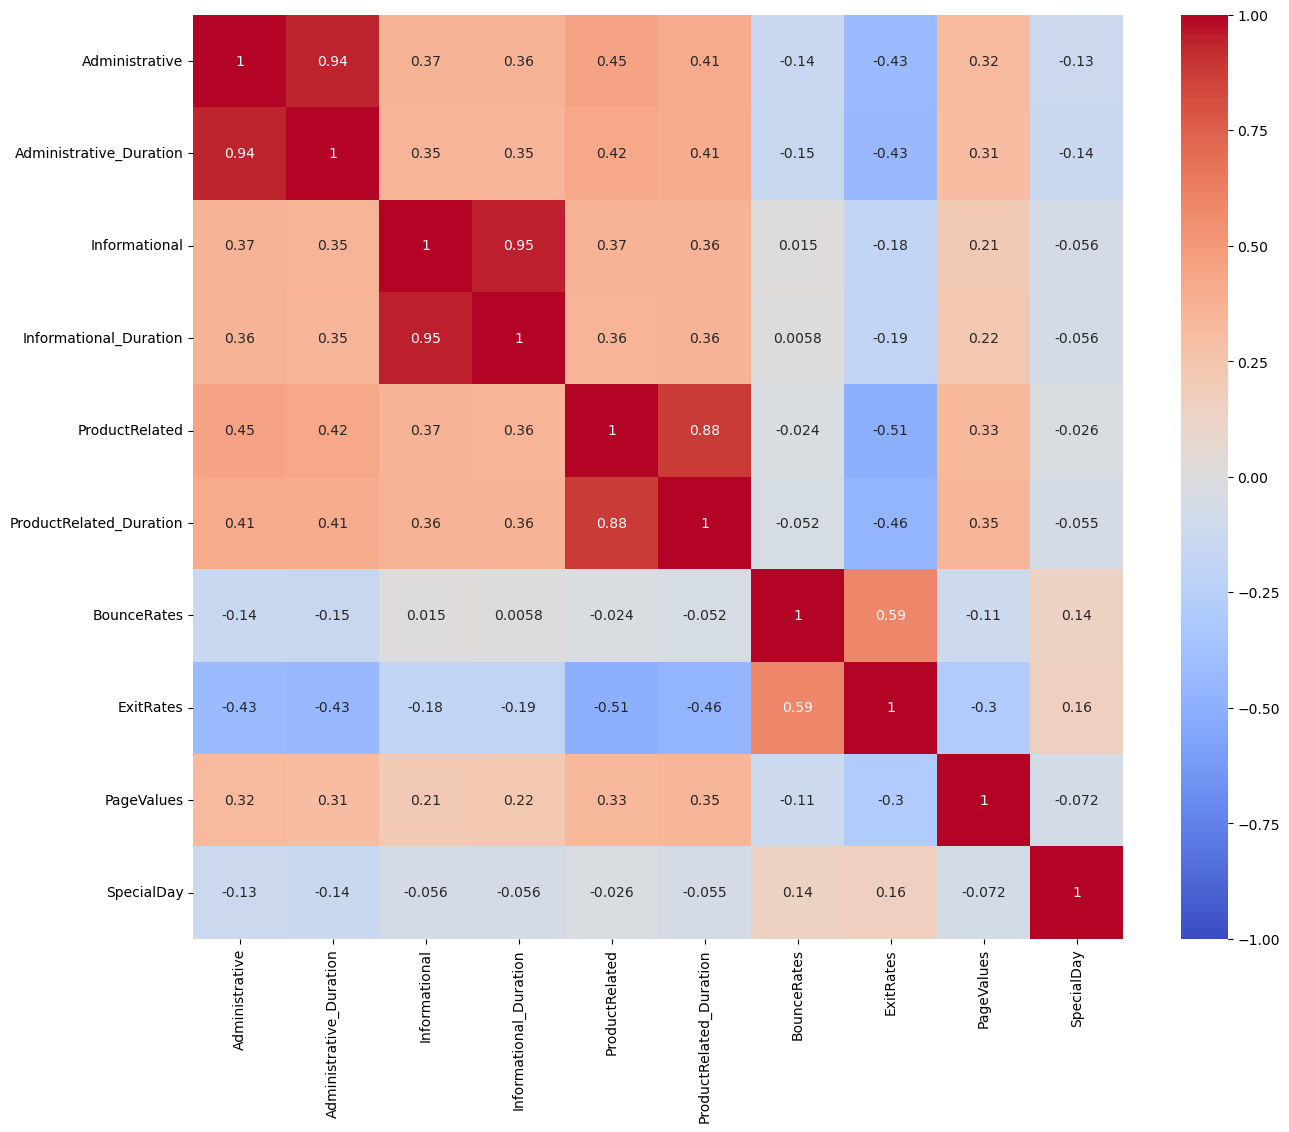

In [68]:
numerical_columns = ["Administrative",	"Administrative_Duration",	"Informational", "Informational_Duration",	"ProductRelated",
                     "ProductRelated_Duration",	"BounceRates",	"ExitRates", "PageValues", "SpecialDay"]
num_df = df[numerical_columns]

plt.figure(figsize=(15,12))
sns.heatmap(num_df.corr(method='spearman'), cmap='coolwarm', annot=True, vmin=-1, vmax=1) # use spearman's correlation as our numerical variables are extremely right skewed

### The following columns appear to be highly correlated:

### Administative & Administrative_Duration
### Informational & Informational_Duration
### ProductRelated & ProductRelated_Duration

### It seems that the more pages a user visits, there is a greater tendency for the user to spend more time visiting the pages as well.

### We can consider dropping Administrative_Duration, Informational_Duration, & ProductRelated_Duration to minimise multicollinearity.

# Explore the correlation between Revenue (which is technically a categorical variable) and all numerical variables using point biserial correlation

### Point Biserial Correlation is used when we want to measure the relationship between a continuous variable and a binary variable

## Calculate correlation coefficients and P-values:

In [32]:
# Calculating point-biserial correlation
administrative_correlation, p_value = stats.pointbiserialr(df['Administrative'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", administrative_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.13649086185231232
P-value: 6.488893354956241e-52


In [33]:
# Calculating point-biserial correlation
administrative_duration_correlation, p_value = stats.pointbiserialr(df['Administrative_Duration'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", administrative_duration_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.09192627413429033
P-value: 2.335101492633904e-24


In [34]:
# Calculating point-biserial correlation
informational_correlation, p_value = stats.pointbiserialr(df['Informational'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", informational_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.09393191698425632
P-value: 2.2970700895440216e-25


In [35]:
# Calculating point-biserial correlation
informational_duration_correlation, p_value = stats.pointbiserialr(df['Informational_Duration'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", informational_duration_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.06945015044571105
P-value: 1.505561866499814e-14


In [36]:
# Calculating point-biserial correlation
productrelated_correlation, p_value = stats.pointbiserialr(df['ProductRelated'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", productrelated_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.15632940906280016
P-value: 9.932319225640801e-68


In [37]:
# Calculating point-biserial correlation
productrelated_duration_correlation, p_value = stats.pointbiserialr(df['ProductRelated_Duration'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", productrelated_duration_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.15051024771743537
P-value: 7.353363482386516e-63


In [38]:
# Calculating point-biserial correlation
bouncerates_correlation, p_value = stats.pointbiserialr(df['BounceRates'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", bouncerates_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: -0.14534995764611885
P-value: 1.0570458648547763e-58


In [39]:
# Calculating point-biserial correlation
exitrates_correlation, p_value = stats.pointbiserialr(df['ExitRates'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", exitrates_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: -0.2043949921341944
P-value: 1.9433426678230365e-115


In [40]:
# Calculating point-biserial correlation
pagevalues_correlation, p_value = stats.pointbiserialr(df['PageValues'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", pagevalues_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.47728900689834997
P-value: 0.0


In [41]:
# Calculating point-biserial correlation
specialday_correlation, p_value = stats.pointbiserialr(df['SpecialDay'], df['Revenue'])
print("Point-Biserial Correlation Coefficient:", specialday_correlation)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: -0.0836643913662079
P-value: 1.9431033562297723e-20


## All point biserial correlations are statistically significant (p-values are less than 0.05), let's create a heatmap for this

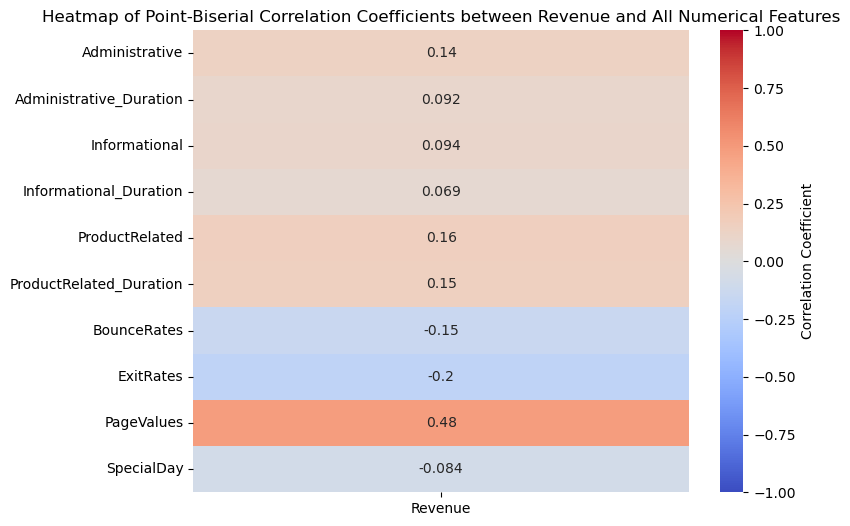

In [81]:
# Create a DataFrame for the point-biserial correlation results
data = {
    'Revenue': [
        administrative_correlation,
        administrative_duration_correlation,
        informational_correlation,
        informational_duration_correlation,
        productrelated_correlation,
        productrelated_duration_correlation,
        bouncerates_correlation,
        exitrates_correlation,
        pagevalues_correlation,
        specialday_correlation
    ]
}

index_labels = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
]

# Creating the DataFrame
point_biserial_correlation_df = pd.DataFrame(data, index=index_labels)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(point_biserial_correlation_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1)
plt.title('Heatmap of Point-Biserial Correlation Coefficients between Revenue and All Numerical Features')
plt.show()

# Explore the association between Revenue (which is technically a categorical variable) and all other categorical variables using Cramer's V association

## Check for association between Revenue and all other categorical variables

In [53]:
# Create a contingency table
table_month_revenue = pd.crosstab(df['Month'], df['Revenue'])

# Perform Chi-square test
chi2_month_revenue, p_month_revenue, dof_month_revenue, expected_month_revenue = chi2_contingency(table)

# Calculate Cramér's V
n_month_revenue = table_month_revenue.sum().sum()  # Total observations
min_dim_month_revenue = min(table_month_revenue.shape) - 1  # Adjustment for the df
cramers_v_month_revenue = np.sqrt(chi2_month_revenue / (n_month_revenue * min_dim_month_revenue))

# Output the results
print("Chi-squared Statistic:", chi2_month_revenue)
print("P-value:", p_month_revenue)
print("Cramér's V:", cramers_v_month_revenue)
print("Degrees of Freedom:", min_dim_month_revenue)

Chi-squared Statistic: 378.3618277464946
P-value: 5.639827644560145e-76
Cramér's V: 0.17593286973171482
Degrees of Freedom: 1


In [54]:
# Create a contingency table
table_operatingsystems_revenue = pd.crosstab(df['OperatingSystems'], df['Revenue'])

# Perform Chi-square test
chi2_operatingsystems_revenue, p_operatingsystems_revenue, dof_operatingsystems_revenue, expected_operatingsystems_revenue = chi2_contingency(table_operatingsystems_revenue)

# Calculate Cramér's V
n_operatingsystems_revenue = table_operatingsystems_revenue.sum().sum()  # Total observations
min_dim_operatingsystems_revenue = min(table_operatingsystems_revenue.shape) - 1  # Adjustment for the df
cramers_v_operatingsystems_revenue = np.sqrt(chi2_operatingsystems_revenue / (n_operatingsystems_revenue * min_dim_operatingsystems_revenue))

# Output the results
print("Chi-squared Statistic:", chi2_operatingsystems_revenue)
print("P-value:", p_operatingsystems_revenue)
print("Cramér's V:", cramers_v_operatingsystems_revenue)
print("Degrees of Freedon:", min_dim_operatingsystems_revenue)

Chi-squared Statistic: 75.29368941381247
P-value: 1.2500905442654903e-13
Cramér's V: 0.0784824620116331
Degrees of Freedon: 1


In [55]:
# Create a contingency table
table_browser_revenue = pd.crosstab(df['Browser'], df['Revenue'])

# Perform Chi-square test
chi2_browser_revenue, p_browser_revenue, dof_browser_revenue, expected_browser_revenue = chi2_contingency(table_browser_revenue)

# Calculate Cramér's V
n_browser_revenue = table_browser_revenue.sum().sum()  # Total observations
min_dim_browser_revenue = min(table_browser_revenue.shape) - 1  # Adjustment for the df
cramers_v_browser_revenue = np.sqrt(chi2_browser_revenue / (n_browser_revenue * min_dim_browser_revenue))

# Output the results
print("Chi-squared Statistic:", chi2_browser_revenue)
print("P-value:", p_browser_revenue)
print("Cramér's V:", cramers_v_browser_revenue)
print("Degrees of Freedon:", min_dim_browser_revenue)

Chi-squared Statistic: 29.245953231437777
P-value: 0.0036217113354891843
Cramér's V: 0.04891321619501619
Degrees of Freedon: 1


In [56]:
# Create a contingency table
table_region_revenue = pd.crosstab(df['Region'], df['Revenue'])

# Perform Chi-square test
chi2_region_revenue, p_region_revenue, dof_region_revenue, expected_region_revenue = chi2_contingency(table_region_revenue)

# Calculate Cramér's V
n_region_revenue = table_region_revenue.sum().sum()  # Total observations
min_dim_region_revenue = min(table_region_revenue.shape) - 1  # Adjustment for the df
cramers_v_region_revenue = np.sqrt(chi2_region_revenue / (n_region_revenue * min_dim_region_revenue))

# Output the results
print("Chi-squared Statistic:", chi2_region_revenue)
print("P-value:", p_region_revenue)
print("Cramér's V:", cramers_v_region_revenue)
print("Degrees of Freedon:", min_dim_region_revenue)

Chi-squared Statistic: 9.64436305973821
P-value: 0.2908791757004453
Cramér's V: 0.028088600733099992
Degrees of Freedon: 1


In [57]:
# Create a contingency table
table_traffictype_revenue = pd.crosstab(df['TrafficType'], df['Revenue'])

# Perform Chi-square test
chi2_traffictype_revenue, p_traffictype_revenue, dof_traffictype_revenue, expected_traffictype_revenue = chi2_contingency(table_traffictype_revenue)

# Calculate Cramér's V
n_traffictype_revenue = table_traffictype_revenue.sum().sum()  # Total observations
min_dim_traffictype_revenue = min(table_traffictype_revenue.shape) - 1  # Adjustment for the df
cramers_v_traffictype_revenue = np.sqrt(chi2_traffictype_revenue / (n_traffictype_revenue * min_dim_traffictype_revenue))

# Output the results
print("Chi-squared Statistic:", chi2_traffictype_revenue)
print("P-value:", p_traffictype_revenue)
print("Cramér's V:", cramers_v_traffictype_revenue)
print("Degrees of Freedon:", min_dim_traffictype_revenue)

Chi-squared Statistic: 361.2945764240735
P-value: 4.711314047824595e-65
Cramér's V: 0.17191906893959835
Degrees of Freedon: 1


In [58]:
# Create a contingency table
table_visitortype_revenue = pd.crosstab(df['VisitorType'], df['Revenue'])

# Perform Chi-square test
chi2_visitortype_revenue, p_visitortype_revenue, dof_visitortype_revenue, expected_visitortype_revenue = chi2_contingency(table_visitortype_revenue)

# Calculate Cramér's V
n_visitortype_revenue = table_visitortype_revenue.sum().sum()  # Total observations
min_dim_visitortype_revenue = min(table_visitortype_revenue.shape) - 1  # Adjustment for the df
cramers_v_visitortype_revenue = np.sqrt(chi2_visitortype_revenue / (n_visitortype_revenue * min_dim_visitortype_revenue))

# Output the results
print("Chi-squared Statistic:", chi2_visitortype_revenue)
print("P-value:", p_visitortype_revenue)
print("Cramér's V:", cramers_v_visitortype_revenue)
print("Degrees of Freedon:", min_dim_visitortype_revenue)

Chi-squared Statistic: 131.20352213166953
P-value: 3.2323409627423847e-29
Cramér's V: 0.1036015078350352
Degrees of Freedon: 1


In [59]:
# Create a contingency table
table_weekend_revenue = pd.crosstab(df['Weekend'], df['Revenue'])

# Perform Chi-square test
chi2_weekend_revenue, p_weekend_revenue, dof_weekend_revenue, expected_weekend_revenue = chi2_contingency(table_weekend_revenue)

# Calculate Cramér's V
n_weekend_revenue = table_weekend_revenue.sum().sum()  # Total observations
min_dim_weekend_revenue = min(table_weekend_revenue.shape) - 1  # Adjustment for the df
cramers_v_weekend_revenue = np.sqrt(chi2_weekend_revenue / (n_weekend_revenue * min_dim_weekend_revenue))

# Output the results
print("Chi-squared Statistic:", chi2_weekend_revenue)
print("P-value:", p_weekend_revenue)
print("Cramér's V:", cramers_v_weekend_revenue)
print("Degrees of Freedon:", min_dim_weekend_revenue)

Chi-squared Statistic: 9.198714596892678
P-value: 0.002421851297873999
Cramér's V: 0.027431963965365486
Degrees of Freedon: 1


## All Cramer's V p-values (except for Region) are statistically significant (p-values are less than 0.05), let's create a heatmap to visualise the associations (leaving out Region)

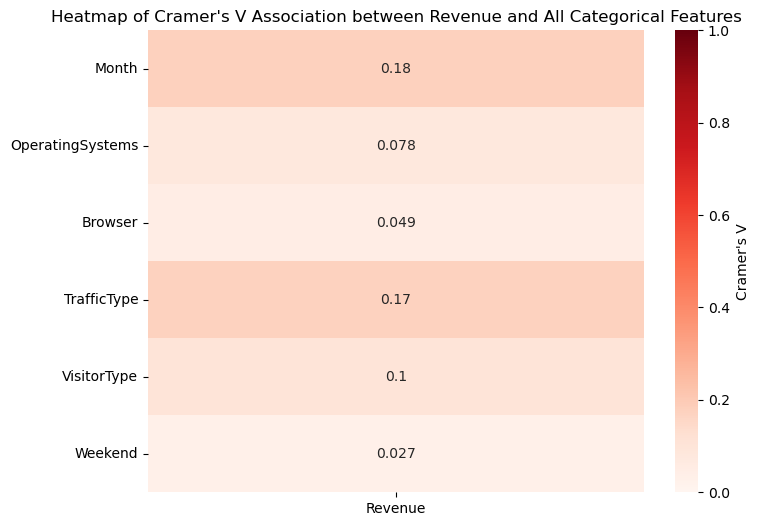

In [90]:
# Create a DataFrame for the cramer's v association results
data = {
    'Revenue': [
        cramers_v_month_revenue,
        cramers_v_operatingsystems_revenue,
        cramers_v_browser_revenue,
        cramers_v_traffictype_revenue,
        cramers_v_visitortype_revenue,
        cramers_v_weekend_revenue
    ]
}

index_labels = [
    'Month',
    'OperatingSystems',
    'Browser',
    'TrafficType',
    'VisitorType',
    'Weekend'
]

# Creating the DataFrame
cramers_v_df = pd.DataFrame(data, index=index_labels)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='Reds', cbar_kws={'label': "Cramer's V"},
            vmin=0, vmax=1)
plt.title("Heatmap of Cramer's V Association between Revenue and All Categorical Features")
plt.show()

# Summary of action steps

## To perform the below before train-test split and training of models:

1. To select these features (based on their correlation and association to the target variable):
- Administrative
- Informational
- ProductRelated
- BounceRates
- ExitRates
- PageValues
- Month
- TrafficType
- VisitorType

Features that can cause multicolinearity, and features that have very low correlation will be excluded in the model training.

2. Min-Max scaling of numerical features (as their values range differently):
- Administrative
- Informational
- ProductRelated
- BounceRates
- ExitRates
- PageValues

3. One-Hot encoding of categorical features:
- Month
- TrafficType
- VisitorType